<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#U.S.-Commercial-Aviation-(2002---2017)-Data-Analysis" data-toc-modified-id="U.S.-Commercial-Aviation-(2002---2017)-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>U.S. Commercial Aviation (2002 - 2017) Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-the-required-libraries" data-toc-modified-id="Loading-the-required-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the required libraries</a></span></li><li><span><a href="#Inserting-the-Airport-Coordinates" data-toc-modified-id="Inserting-the-Airport-Coordinates-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inserting the Airport Coordinates</a></span></li><li><span><a href="#Loading-the-Airport-Code-Dataset" data-toc-modified-id="Loading-the-Airport-Code-Dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading the Airport Code Dataset</a></span></li><li><span><a href="#Making-Connections-between-Airports" data-toc-modified-id="Making-Connections-between-Airports-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Making Connections between Airports</a></span></li><li><span><a href="#Network-Map" data-toc-modified-id="Network-Map-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Network Map</a></span><ul class="toc-item"><li><span><a href="#Creating-a-US-Map" data-toc-modified-id="Creating-a-US-Map-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Creating a US Map</a></span></li><li><span><a href="#Defining-colors-for-the-map" data-toc-modified-id="Defining-colors-for-the-map-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Defining colors for the map</a></span></li><li><span><a href="#Creating-a-Network-Map-with-Origin-as-Atlanta" data-toc-modified-id="Creating-a-Network-Map-with-Origin-as-Atlanta-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Creating a Network Map with Origin as Atlanta</a></span></li><li><span><a href="#Plotting-flight-routes-from-LA,-Atlanta,-and-Chicago" data-toc-modified-id="Plotting-flight-routes-from-LA,-Atlanta,-and-Chicago-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Plotting flight routes from LA, Atlanta, and Chicago</a></span></li></ul></li><li><span><a href="#Variation-of-Flights-over-the-years-by-Different-Airports" data-toc-modified-id="Variation-of-Flights-over-the-years-by-Different-Airports-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Variation of Flights over the years by Different Airports</a></span><ul class="toc-item"><li><span><a href="#Heatmap---Domestic-Flights" data-toc-modified-id="Heatmap---Domestic-Flights-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Heatmap - Domestic Flights</a></span></li><li><span><a href="#Heatmap---International-Flights" data-toc-modified-id="Heatmap---International-Flights-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Heatmap - International Flights</a></span></li></ul></li><li><span><a href="#Variation-of-the-percentage-of-domestic/international-flights-per-Airport" data-toc-modified-id="Variation-of-the-percentage-of-domestic/international-flights-per-Airport-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Variation of the percentage of domestic/international flights per Airport</a></span><ul class="toc-item"><li><span><a href="#Multi-Panel-plot" data-toc-modified-id="Multi-Panel-plot-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Multi Panel plot</a></span></li><li><span><a href="#Heatmap---Domestic-Flights" data-toc-modified-id="Heatmap---Domestic-Flights-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Heatmap - Domestic Flights</a></span></li><li><span><a href="#Heatmap---International-Flights" data-toc-modified-id="Heatmap---International-Flights-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Heatmap - International Flights</a></span></li></ul></li><li><span><a href="#Exploring-Year-2014" data-toc-modified-id="Exploring-Year-2014-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Exploring Year 2014</a></span><ul class="toc-item"><li><span><a href="#Merging-the-above-two-dataframes-by-Airport.Name" data-toc-modified-id="Merging-the-above-two-dataframes-by-Airport.Name-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Merging the above two dataframes by Airport.Name</a></span></li><li><span><a href="#Barchart-showing-the-top-7-busiest-Airports" data-toc-modified-id="Barchart-showing-the-top-7-busiest-Airports-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Barchart showing the top 7 busiest Airports</a></span></li><li><span><a href="#Radarchart-showing-Airline-Performance-in-2014" data-toc-modified-id="Radarchart-showing-Airline-Performance-in-2014-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Radarchart showing Airline Performance in 2014</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# U.S. Commercial Aviation (2002 - 2017) Data Analysis

<img src="logo_airlines.png" >

In this notebook, I analyzed the U.S. Commercial Aviation Industry Data. This dataset was made available by the U.S. Department of Transportation's TranStats service makes available on various metrics for 15 U.S. airlines and 30 major U.S airports. Their website unfortunately does not include a method for easily downloading and sharing files. I downloaded this dataset from [Kaggle](https://www.kaggle.com/shellshock1911/us-commercial-aviation-industry-metrics).

Following tasks were performed:
- Network map was created for 3 major airports, that are: Hartsfield-Jackson Atlanta International Airport, Los Angeles International Airport, Chicago O'Hare International Airport
- Heatmap was created to understand the variation of flights over the years for different Airports and Airlines
- Multi panel plot was created to understand the variation of Domestic and International flights (Percentages) over the years at different airports
- Explored the 2014 Year in detail to understand the busiest Airports in terms of Domestic and International Flights. 
- Made a radar map to understand the count of domestic/international flights and total of number of passengers that travelled through those airlines in 2014.

## Loading the required libraries

In [1]:
library(ggplot2)
library(dplyr)
library(gridExtra)
library(RColorBrewer)
library(ggthemes)
library(ggrepel)
library(maps)
library(geosphere)
library(knitr)
library(fmsb)
library(date)
library(scales)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'gridExtra' was built under R version 3.6.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ggthemes' was built under R version 3.6.3"
Warning message:
"package 'ggrepel' was built under R version 3.6.3"
Warning message:
"package 'geosphere' was built under R version 3.6.3"
Warning message:
"package 'fmsb' was built under R version 3.6.3"
Warning message:
"package 'date' was built under R version 3.6.2"
Warning message:
"package 'scales' was built under R version 3.6.3"


## Inserting the Airport Coordinates

"ggmap" does not work with Jupyter Notebook R kernels so I decided to impute the longitude and latitude values directly.

In [2]:
LONG<-c(-84.42770,-76.66839,-71.00956,-80.94731,-87.75219,-87.90732,-96.85121,-97.04034,-104.99025, -83.35538,-80.15060,
        -95.33678,-115.15374,-118.24368,-80.19179,-93.20100,-73.77814,-73.87397,-74.17446,-81.37924,-75.16522,-112.00779,
        -122.67648,-111.89105,-117.16108,-122.41942,-122.30882,-82.45718,  -77.04023,-77.45654)
LAT<-c(33.64073,39.17740,42.36561,35.21440,41.78678,41.97416,32.84810,32.89981,39.73924,42.21617,26.07423,29.99022,
       36.08400,34.05223,25.76168,44.93748,40.64131,40.77693,40.68953,28.53834, 39.95258,33.43727,45.52306,40.76078,
       32.71574,37.77493,47.45025,27.95058,38.85124,38.95312)

## Loading the Airport Code Dataset

In [3]:
df = read.csv("airport_codes.csv", header=T)

df$long = LONG
df$lat = LAT
head(df,7)

Airport.Code,Airport.Name,long,lat
ATL,Hartsfield-Jackson Atlanta,-84.42770,33.64073
BWI,Baltimore-Washington,-76.66839,39.17740
BOS,Boston Logan,-71.00956,42.36561
CLT,Charlotte Douglas,-80.94731,35.21440
MDW,Chicago Midway,-87.75219,41.78678
ORD,Chicago O'Hare,-87.90732,41.97416
DAL,Dallas Love Field,-96.85121,32.84810


## Making Connections between Airports

The code below is :

- looping over airports
- retrieve the (longitude, latitude) as vector2.
- use gcIntermediate with a start_point, end_point (current loop iterator), n being the number of points in the line.
- save it as a dataframe (initially it is saved as a matrix) and append it to a list that holds the results.
- add start_airport, end_airport

In [4]:
allConnections_list<-list()

for(i in 1:nrow(df)){
  allConnections_df<-data.frame(lon=double(), lat=double(), start_airport=character(), end_airport = character())
  start<-c(df$long[i],df$lat[i])
  for(j in 1:nrow(df)){
    if(i!=j){
      end<-c(df$long[j],df$lat[j])
            inter <- data.frame(gcIntermediate(start,  end, n=100, addStartEnd=TRUE, breakAtDateLine=F))
            inter$start_airport <- rep(df$Airport.Code[i],nrow(inter))
            inter$end_airport <- rep(df$Airport.Code[j],nrow(inter))
            allConnections_df<-rbind(allConnections_df,inter)
    }
  }
  allConnections_list[[i]]<-allConnections_df
}

## Network Map

### Creating a US Map

In [5]:
states_map <-map_data("state")
USMAP <- ggplot() + 
  geom_map(data = states_map, 
           map = states_map,aes(x = long, y = lat, map_id = region, group = group),
           fill = "white", color = "black", size = 0.1)

Warning message:
"Ignoring unknown aesthetics: x, y"


### Defining colors for the map

In [6]:
#define customs color from rcolorbrewer, to be extended to n>10
mycols<-c("#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", "#E31A1C", "#FDBF6F", "#FF7F00", 
          "#CAB2D6", "#6A3D9A", "#B15928")

### Creating a Network Map with Origin as Atlanta

Warning message:
"Use of `df$Airport.Name` is discouraged. Use `Airport.Name` instead."
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


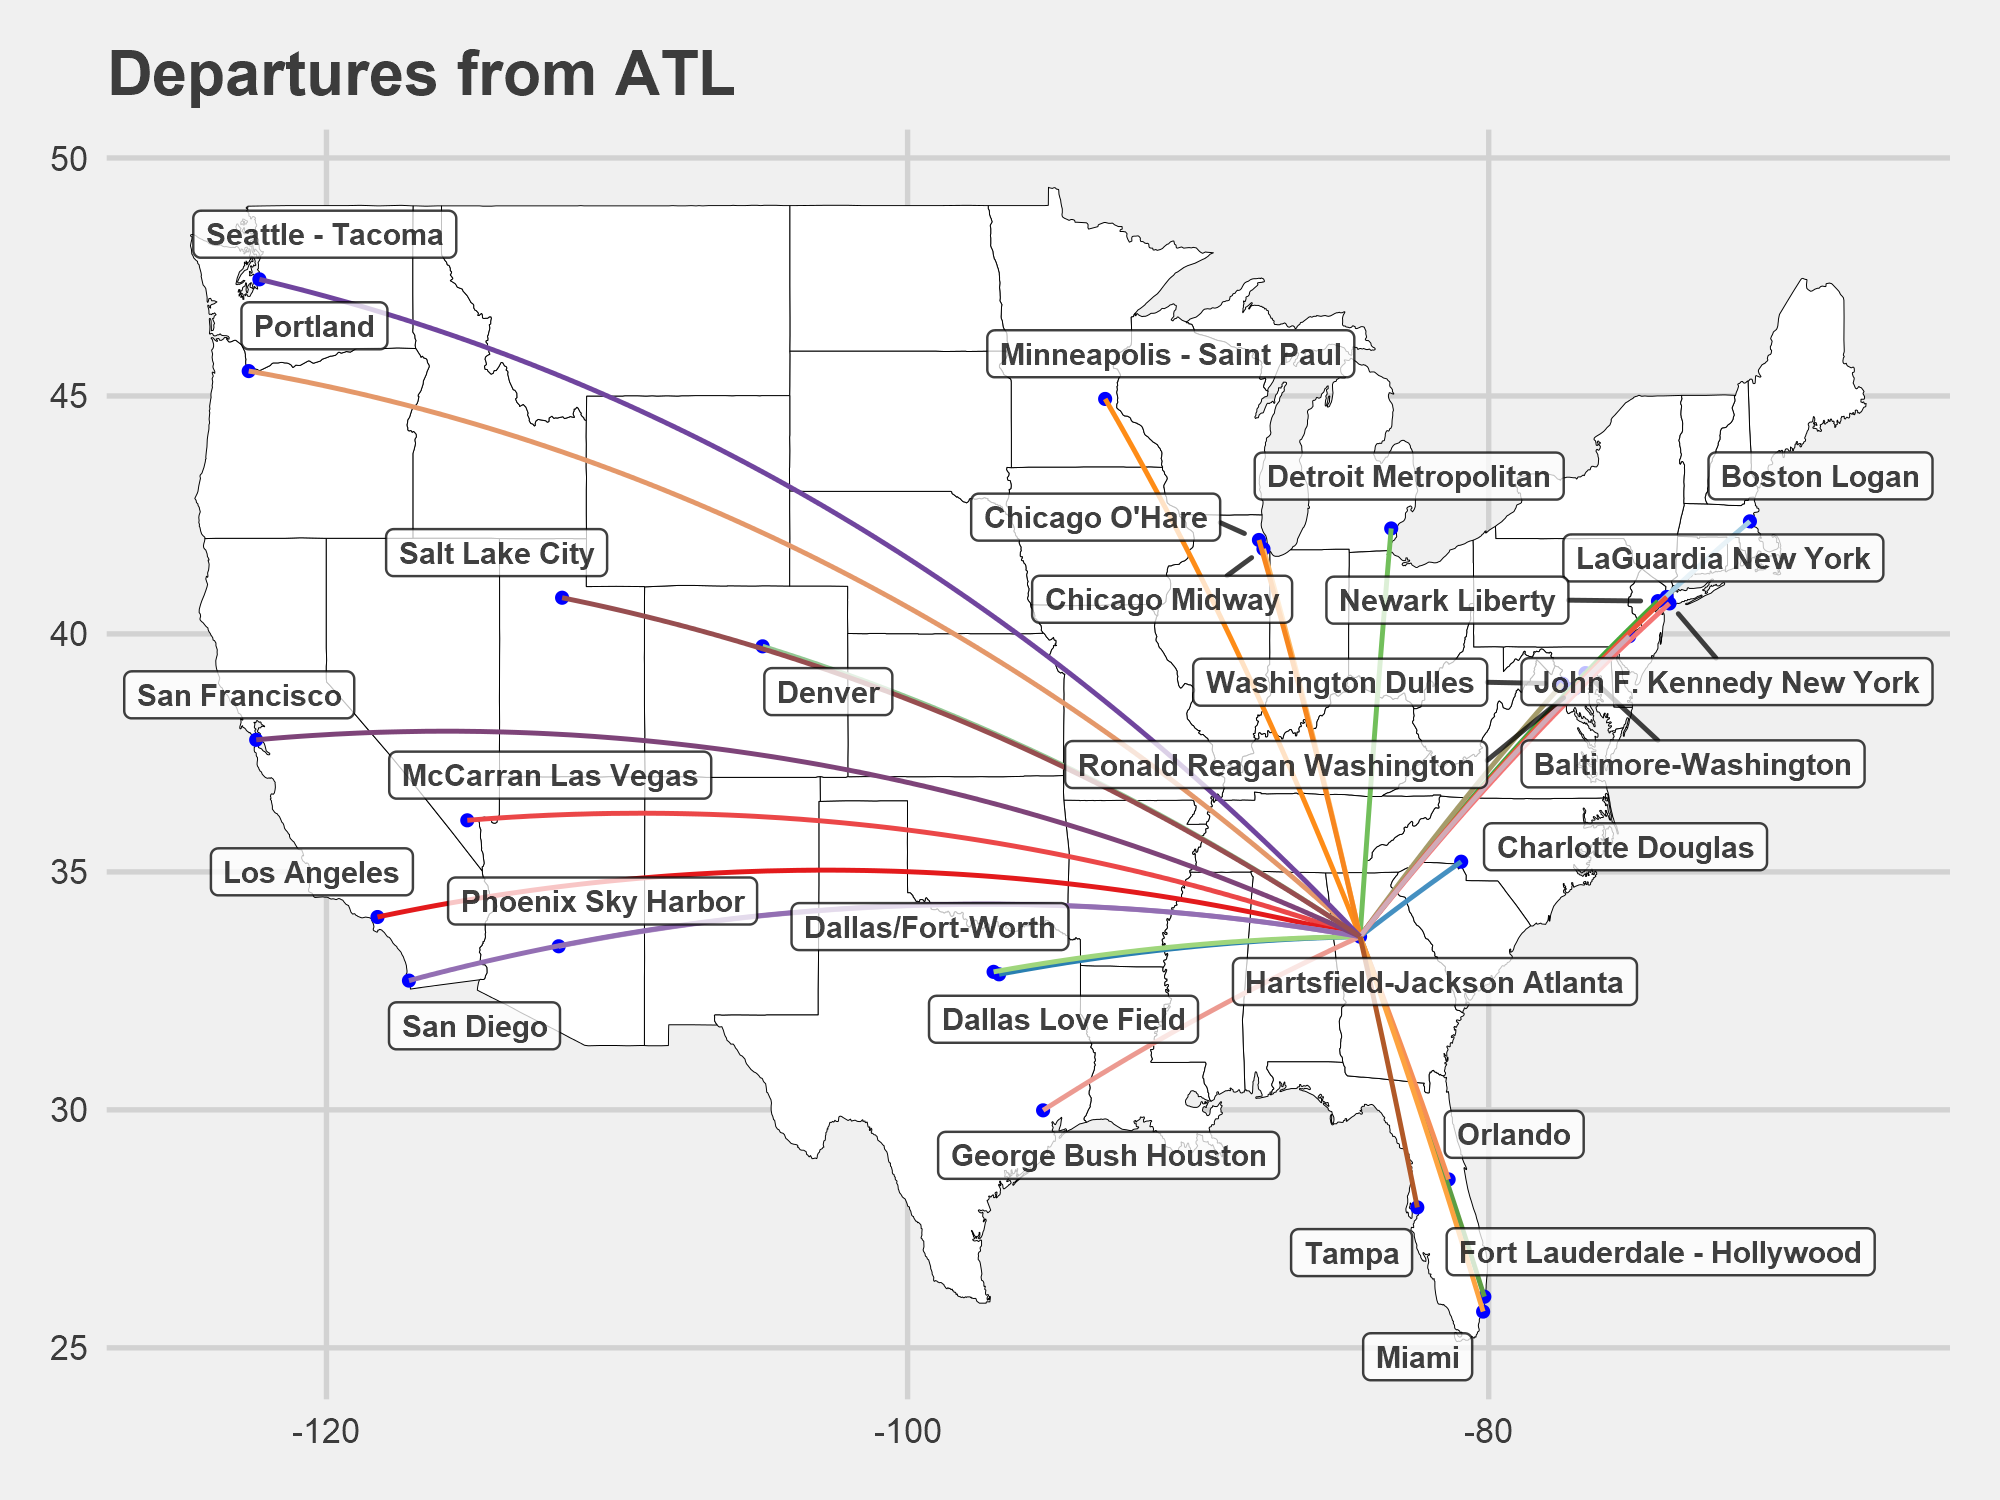

In [7]:
options(repr.plot.width=8, repr.plot.height=6,repr.plot.res = 250) #Defining the picture size and resolution
USMAP + 
  geom_point(data=df,aes(x=long,y=lat),size=1,color='blue',alpha=1.3) + 
  geom_line(data=allConnections_list[[1]],aes(x=lon,y=lat,color=end_airport)) +
  geom_label_repel(data=df,aes(x=long,y=lat,label=df$Airport.Name),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=.75) + 
  theme_fivethirtyeight() + 
  theme(legend.position='none') + 
  scale_color_manual(values=colorRampPalette(mycols)(length(unique(allConnections_list[[1]]$end_airport)))) + 
  ggtitle(paste0('Departures from ',unique(allConnections_list[[1]]$start_airport)))

### Plotting flight routes from LA, Atlanta, and Chicago

Warning message:
"Use of `df$Airport.Name` is discouraged. Use `Airport.Name` instead."
Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


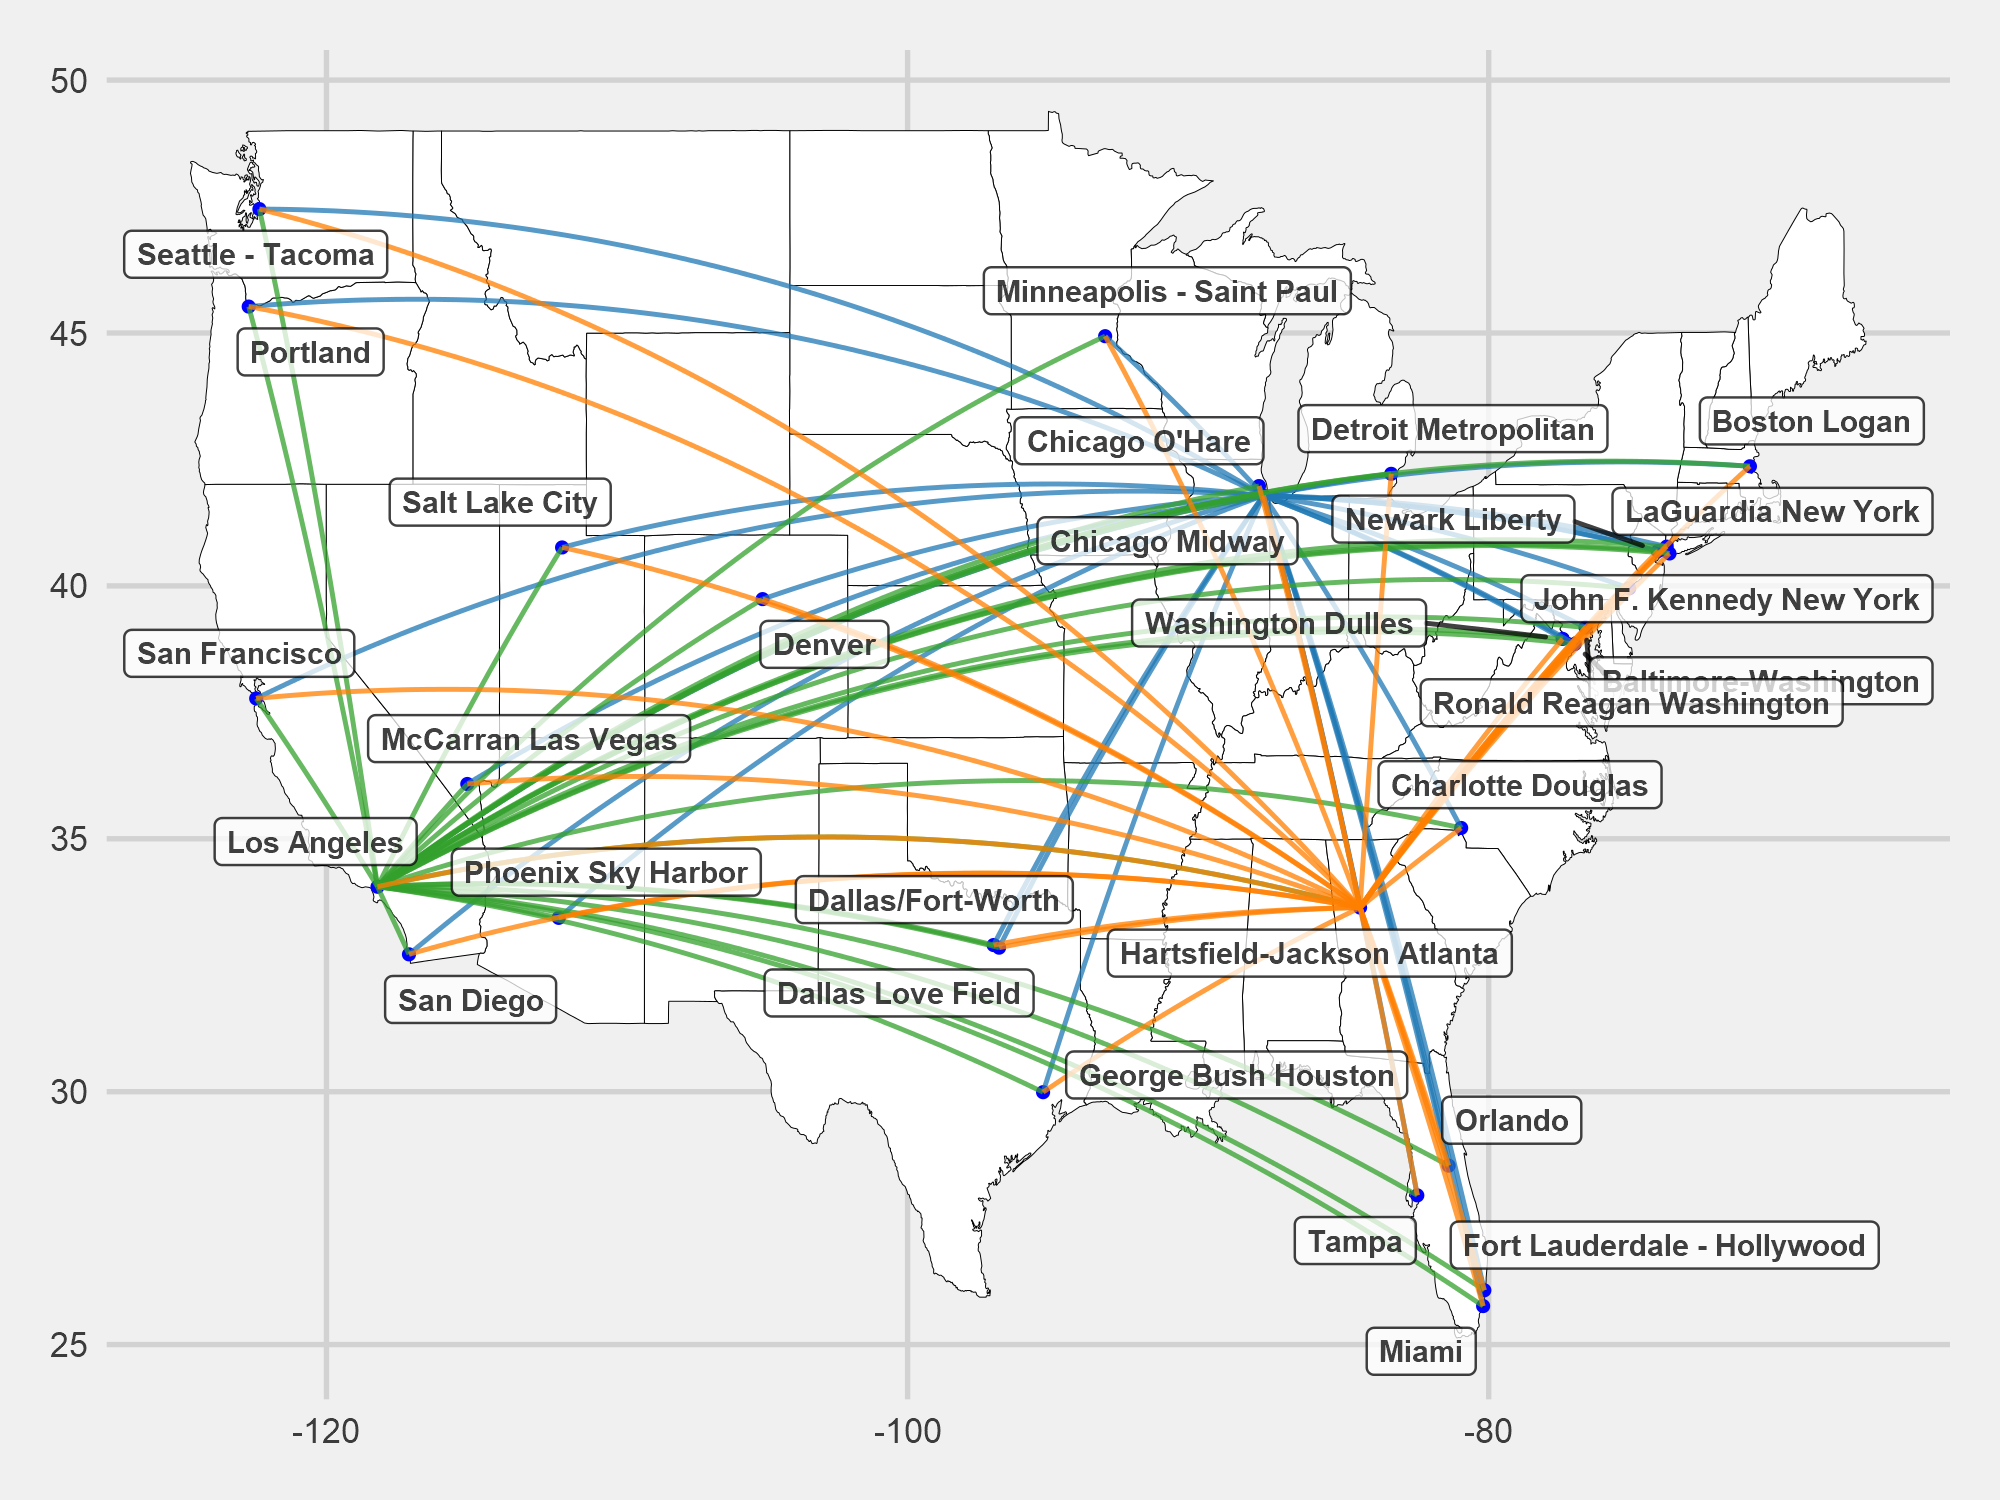

In [8]:
USMAP + 
  geom_point(data=df,aes(x=long,y=lat),size=1,color='blue',alpha=1) + 
  geom_line(data=allConnections_list[[5]],aes(x=lon,y=lat,group=end_airport),color='#1F78B4',alpha=.75) + 
  geom_line(data=allConnections_list[[14]],aes(x=lon,y=lat,group=end_airport),color='#33A02C',alpha=.75) + 
  geom_line(data=allConnections_list[[1]],aes(x=lon,y=lat,group=end_airport),color='#FF7F00',alpha=.75) + 
  geom_label_repel(data=df,aes(x=long,y=lat,label=df$Airport.Name),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=.75) + 
  theme_fivethirtyeight() + theme(legend.position='none')

These connections are not real as I connected all the airports listed in the csv file.

## Variation of Flights over the years by Different Airports

In [9]:
#Defining an empty list
AirlinesPerAirport = list()

#Reading the files
for(cnt in 1:length(df$Airport.Name)){
    AirlinesPerAirport[[cnt]]<-read.csv(paste0('data/all_airlines-',df$Airport.Code[cnt],'.csv'))
    AirlinesPerAirport[[cnt]]$Airport.Code<-rep(df$Airport.Code[cnt],nrow(AirlinesPerAirport[[cnt]]))
    AirlinesPerAirport[[cnt]]$Airport.Name<-rep(df$Airport.Name[cnt],nrow(AirlinesPerAirport[[cnt]]))
}
Airlines_df = do.call("rbind", AirlinesPerAirport)
Airlines_df$Date = as.Date(Airlines_df$Date, format = "%Y-%m-%d")
Airlines_df$Month = months(as.Date(Airlines_df$Date, format = "%Y-%m-%d"))
Airlines_df$Year =as.numeric(format(Airlines_df$Date, "%Y"))

### Heatmap - Domestic Flights

In [79]:
head(Airlines_df)

Date,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International,Airport.Code,Airport.Name,Month,Year
2002-10-01,2824495,1195044,33127,2225,2996724,245186,2013396,809409,ATL,Hartsfield-Jackson Atlanta,October,2002
2002-11-01,2679971,1123049,31504,2227,2826112,237832,1890579,766606,ATL,Hartsfield-Jackson Atlanta,November,2002
2002-12-01,2762865,1093904,32371,2302,3085834,257836,2134968,809230,ATL,Hartsfield-Jackson Atlanta,December,2002
2003-01-01,2794855,1089678,33041,2304,2686976,234276,1858455,736141,ATL,Hartsfield-Jackson Atlanta,January,2003
2003-02-01,2458733,904631,29104,1956,2554385,199800,1738958,602275,ATL,Hartsfield-Jackson Atlanta,February,2003
2003-03-01,2771575,1054498,33096,2233,3044047,235164,2058733,744490,ATL,Hartsfield-Jackson Atlanta,March,2003


`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



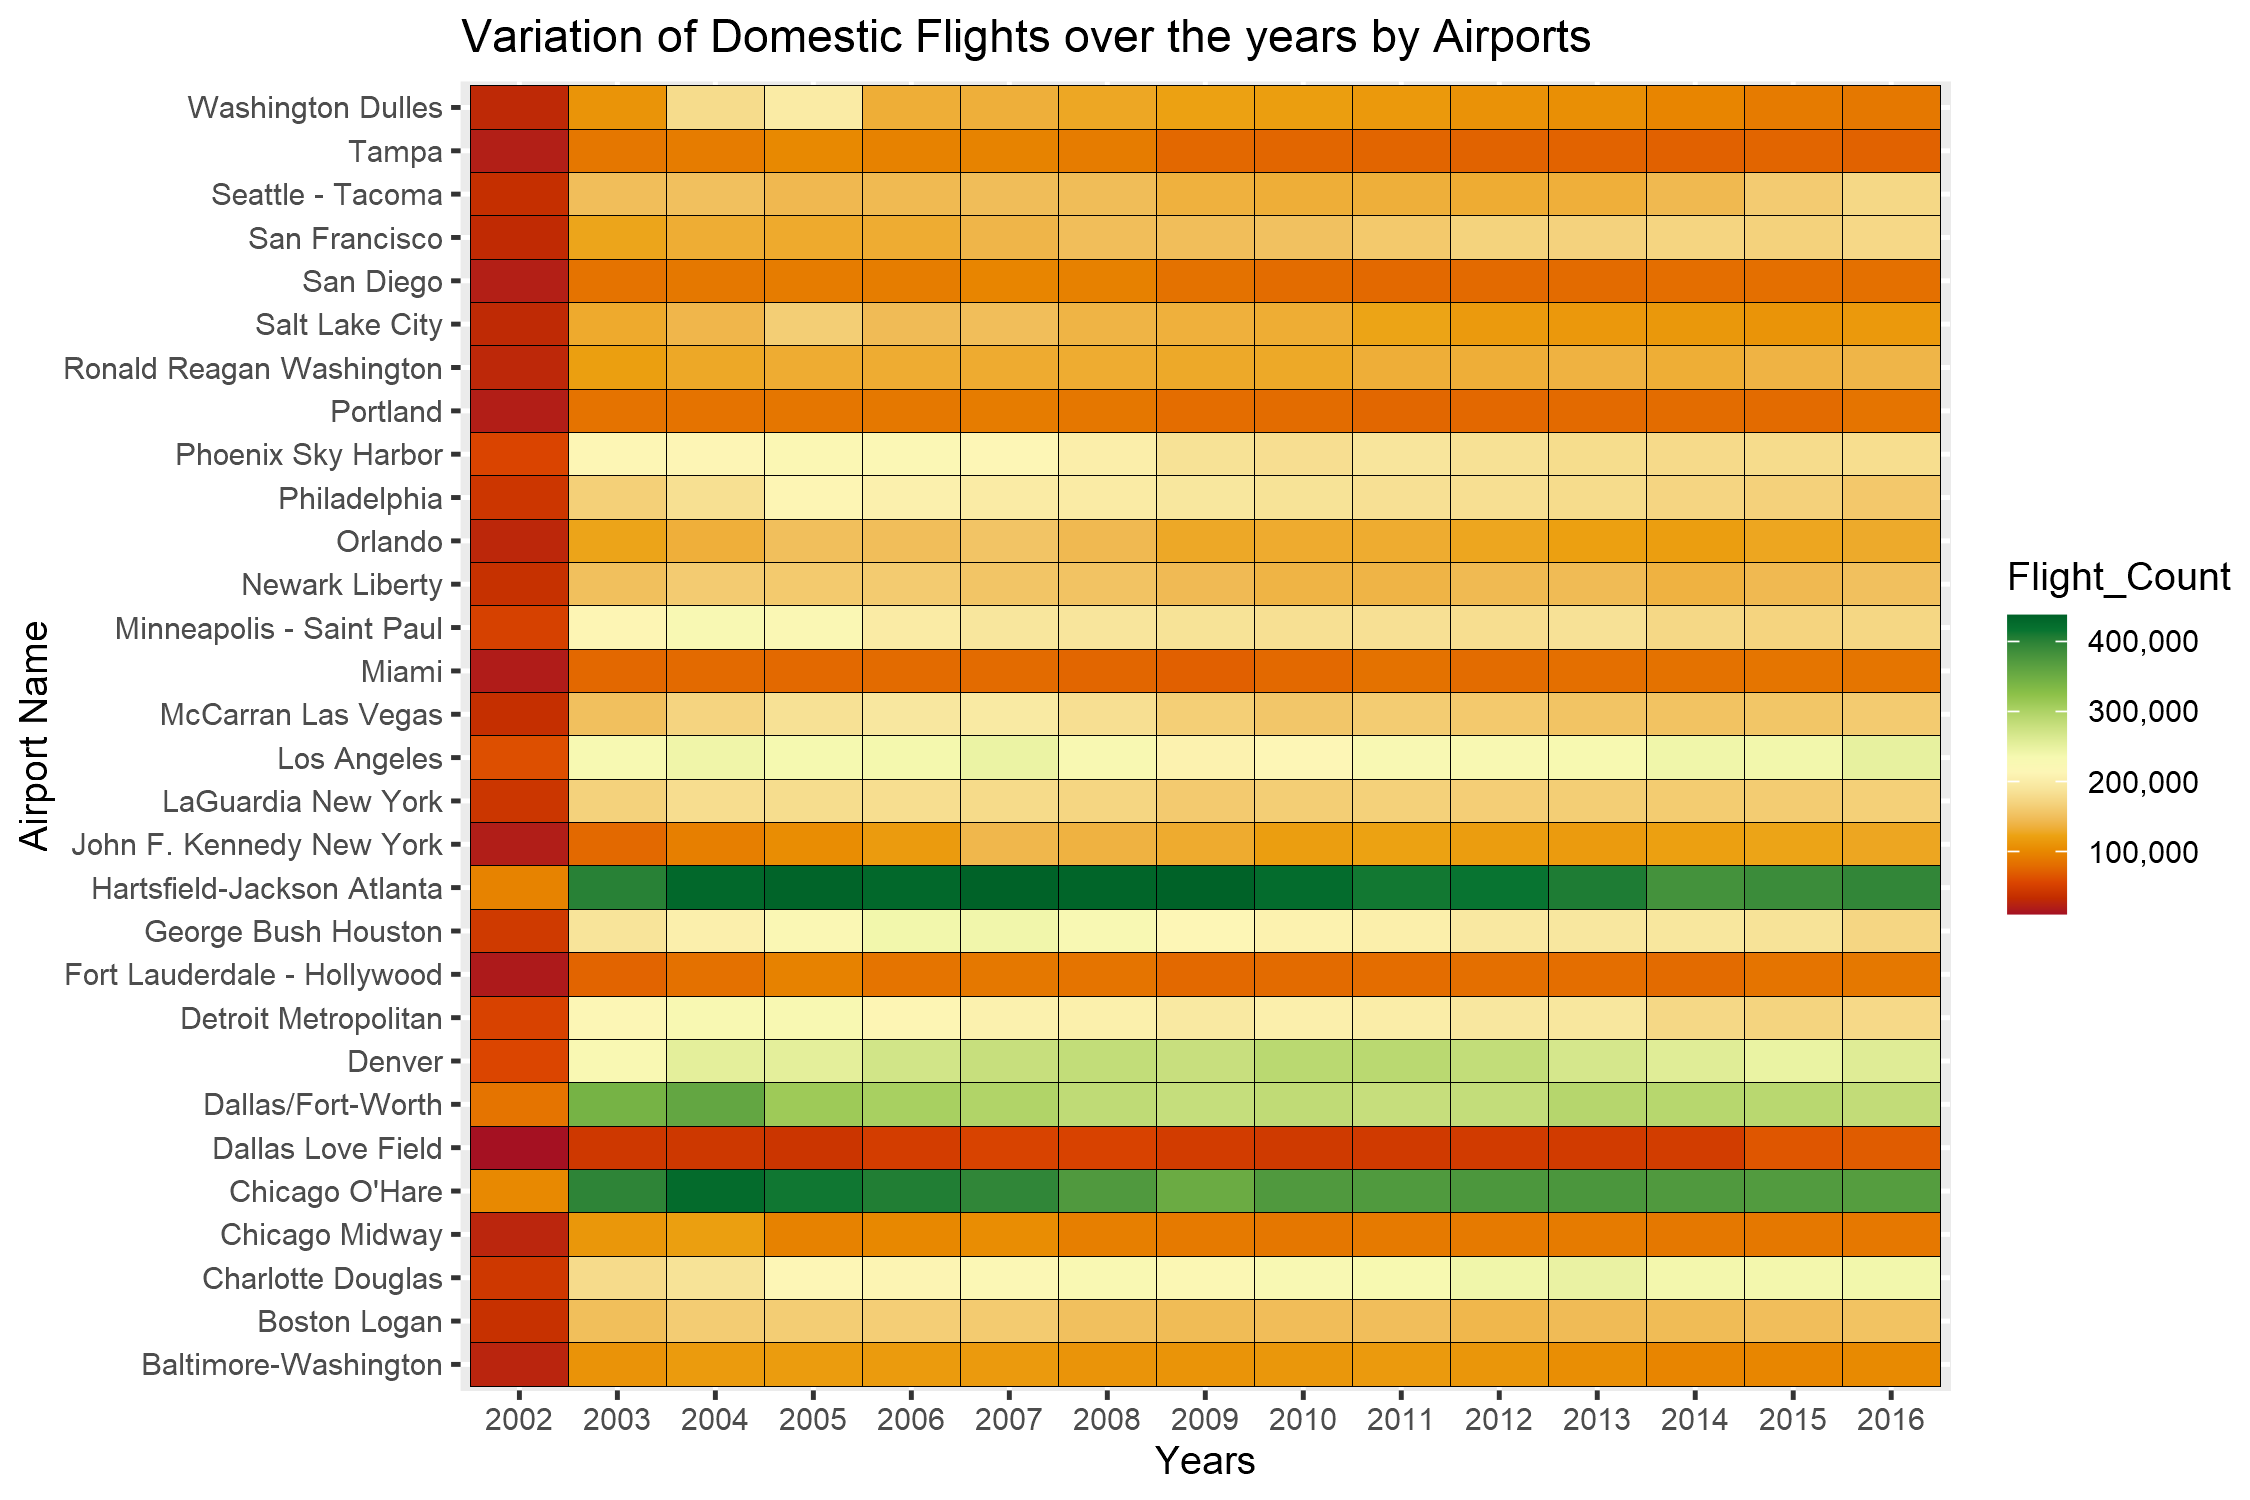

In [38]:
options(repr.plot.width=9, repr.plot.height=6,repr.plot.res = 250) #Defining the picture size and resolution
Airlines_df %>%
filter(Year<2017) %>%
group_by(Year, Airport.Name) %>%
summarise(Flight_Count = sum(Flights_Domestic)) %>%
ggplot(aes(x=as.factor(Year), y=Airport.Name, fill = Flight_Count))+geom_tile()+  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), label = comma) +
ggtitle('Variation of Domestic Flights over the years by Airports')+ylab("Airport Name")+
xlab("Years")

Hartsfield-Jackson Atlanta International Airport appeears to be the busiest airport throughout the years. The year 2009 looks to be the busiest Hartsfield-Jackson Airport. On the other hand, Dallas Love Field airport appears to be the least busiest airport out of all. The year 2002 appears to be completely red. This is because the dataset contains only the last two monts of data for the year 2002.  

### Heatmap - International Flights

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



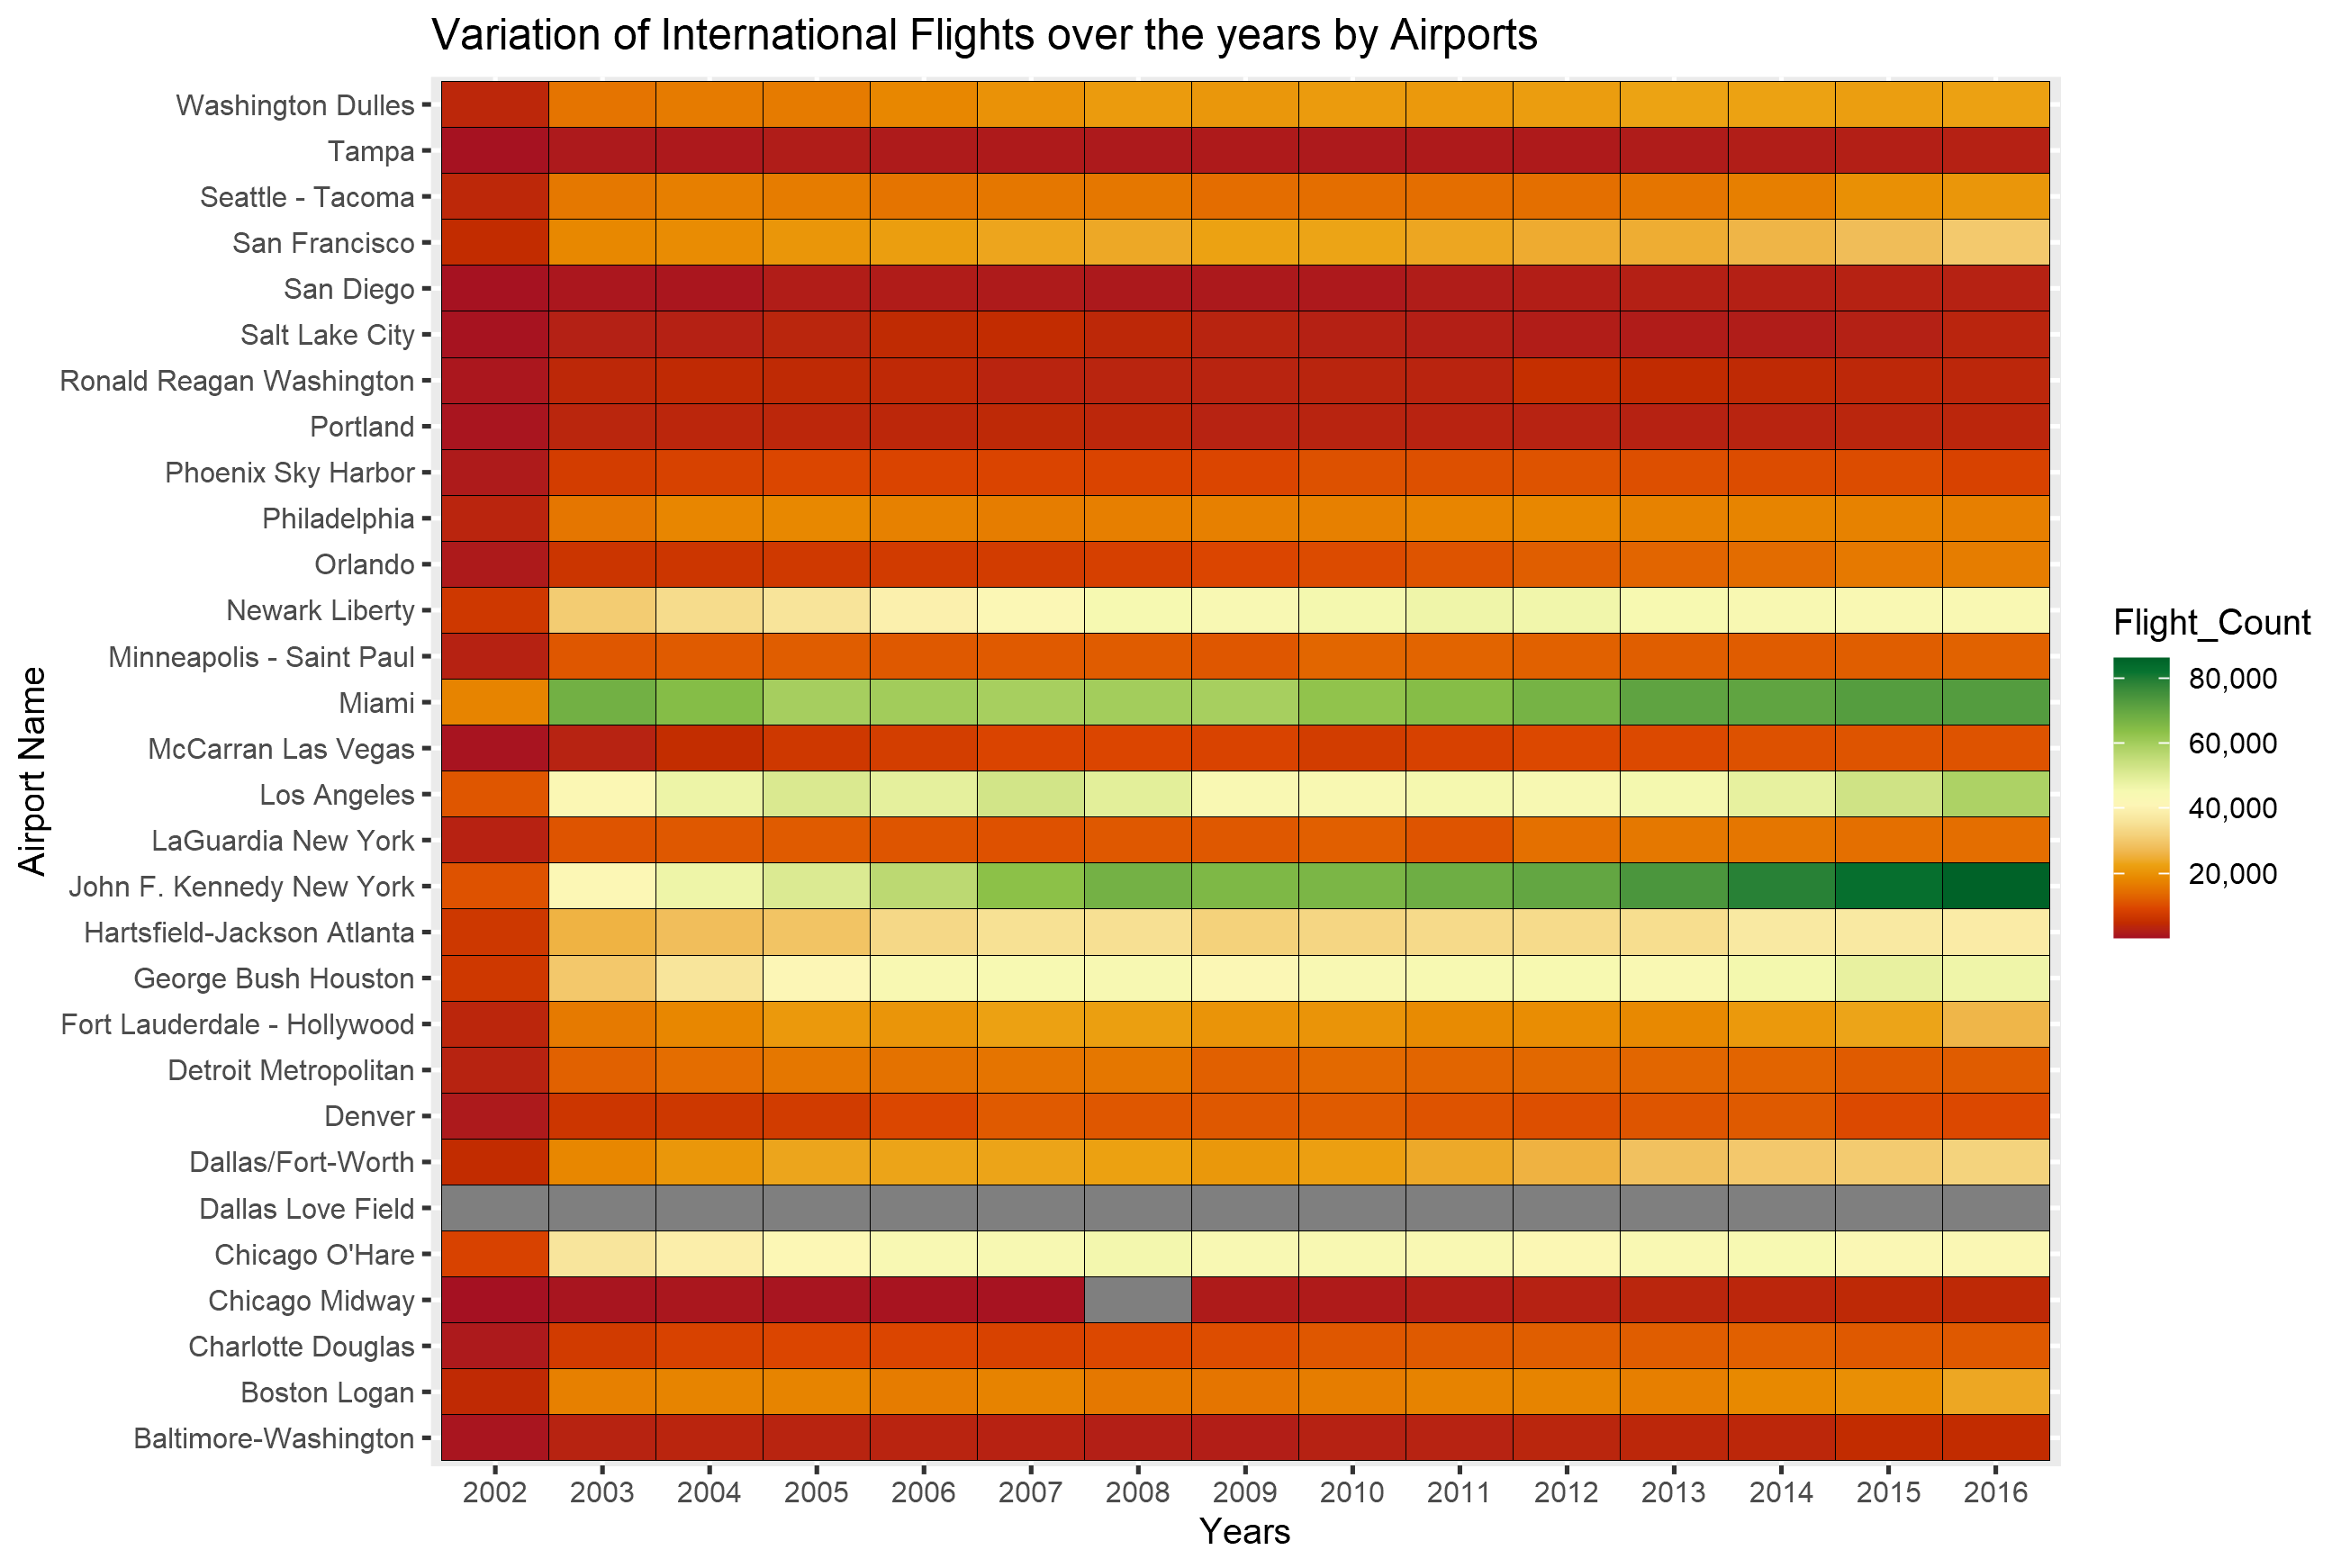

In [80]:
Airlines_df %>%
group_by(Year, Airport.Name) %>%
filter(Year<2017) %>%
summarise(Flight_Count = sum(Flights_International)) %>%
ggplot(aes(x=as.factor(Year), y=Airport.Name, fill = Flight_Count))+geom_tile()+  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), label = comma) +
ggtitle('Variation of International Flights over the years by Airports')+ylab("Airport Name")+
xlab("Years")

The number of international flights arriving and departing the JFK Airport has increased exponentially over the years.  For Miami, it looks the number of International flights increased till 2002 and then decreased till 2009 and then started increasing again till 2016. No international flight landed or Departed the Dallas Love Field airport from 2002 - 2016.

## Variation of the percentage of domestic/international flights per Airport 

In [83]:
SummaryPercent = Airlines_df %>%
#Getting rid of year 2017 
filter(Year<2017) %>%
group_by(Year, Airport.Name) %>%
summarise(DomesticFlights = sum(Flights_Domestic),
          InternationalFlights = sum(Flights_International)) %>%
mutate(FlightSum = DomesticFlights+InternationalFlights,
      InternationalFlightsPerc = round(InternationalFlights/FlightSum,2)*100,
       DomesticFlightsPerc = 100-InternationalFlightsPerc)

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



### Multi Panel plot

Warning message:
"Removed 16 rows containing missing values (geom_point)."
Warning message:
"Removed 16 rows containing missing values (geom_point)."


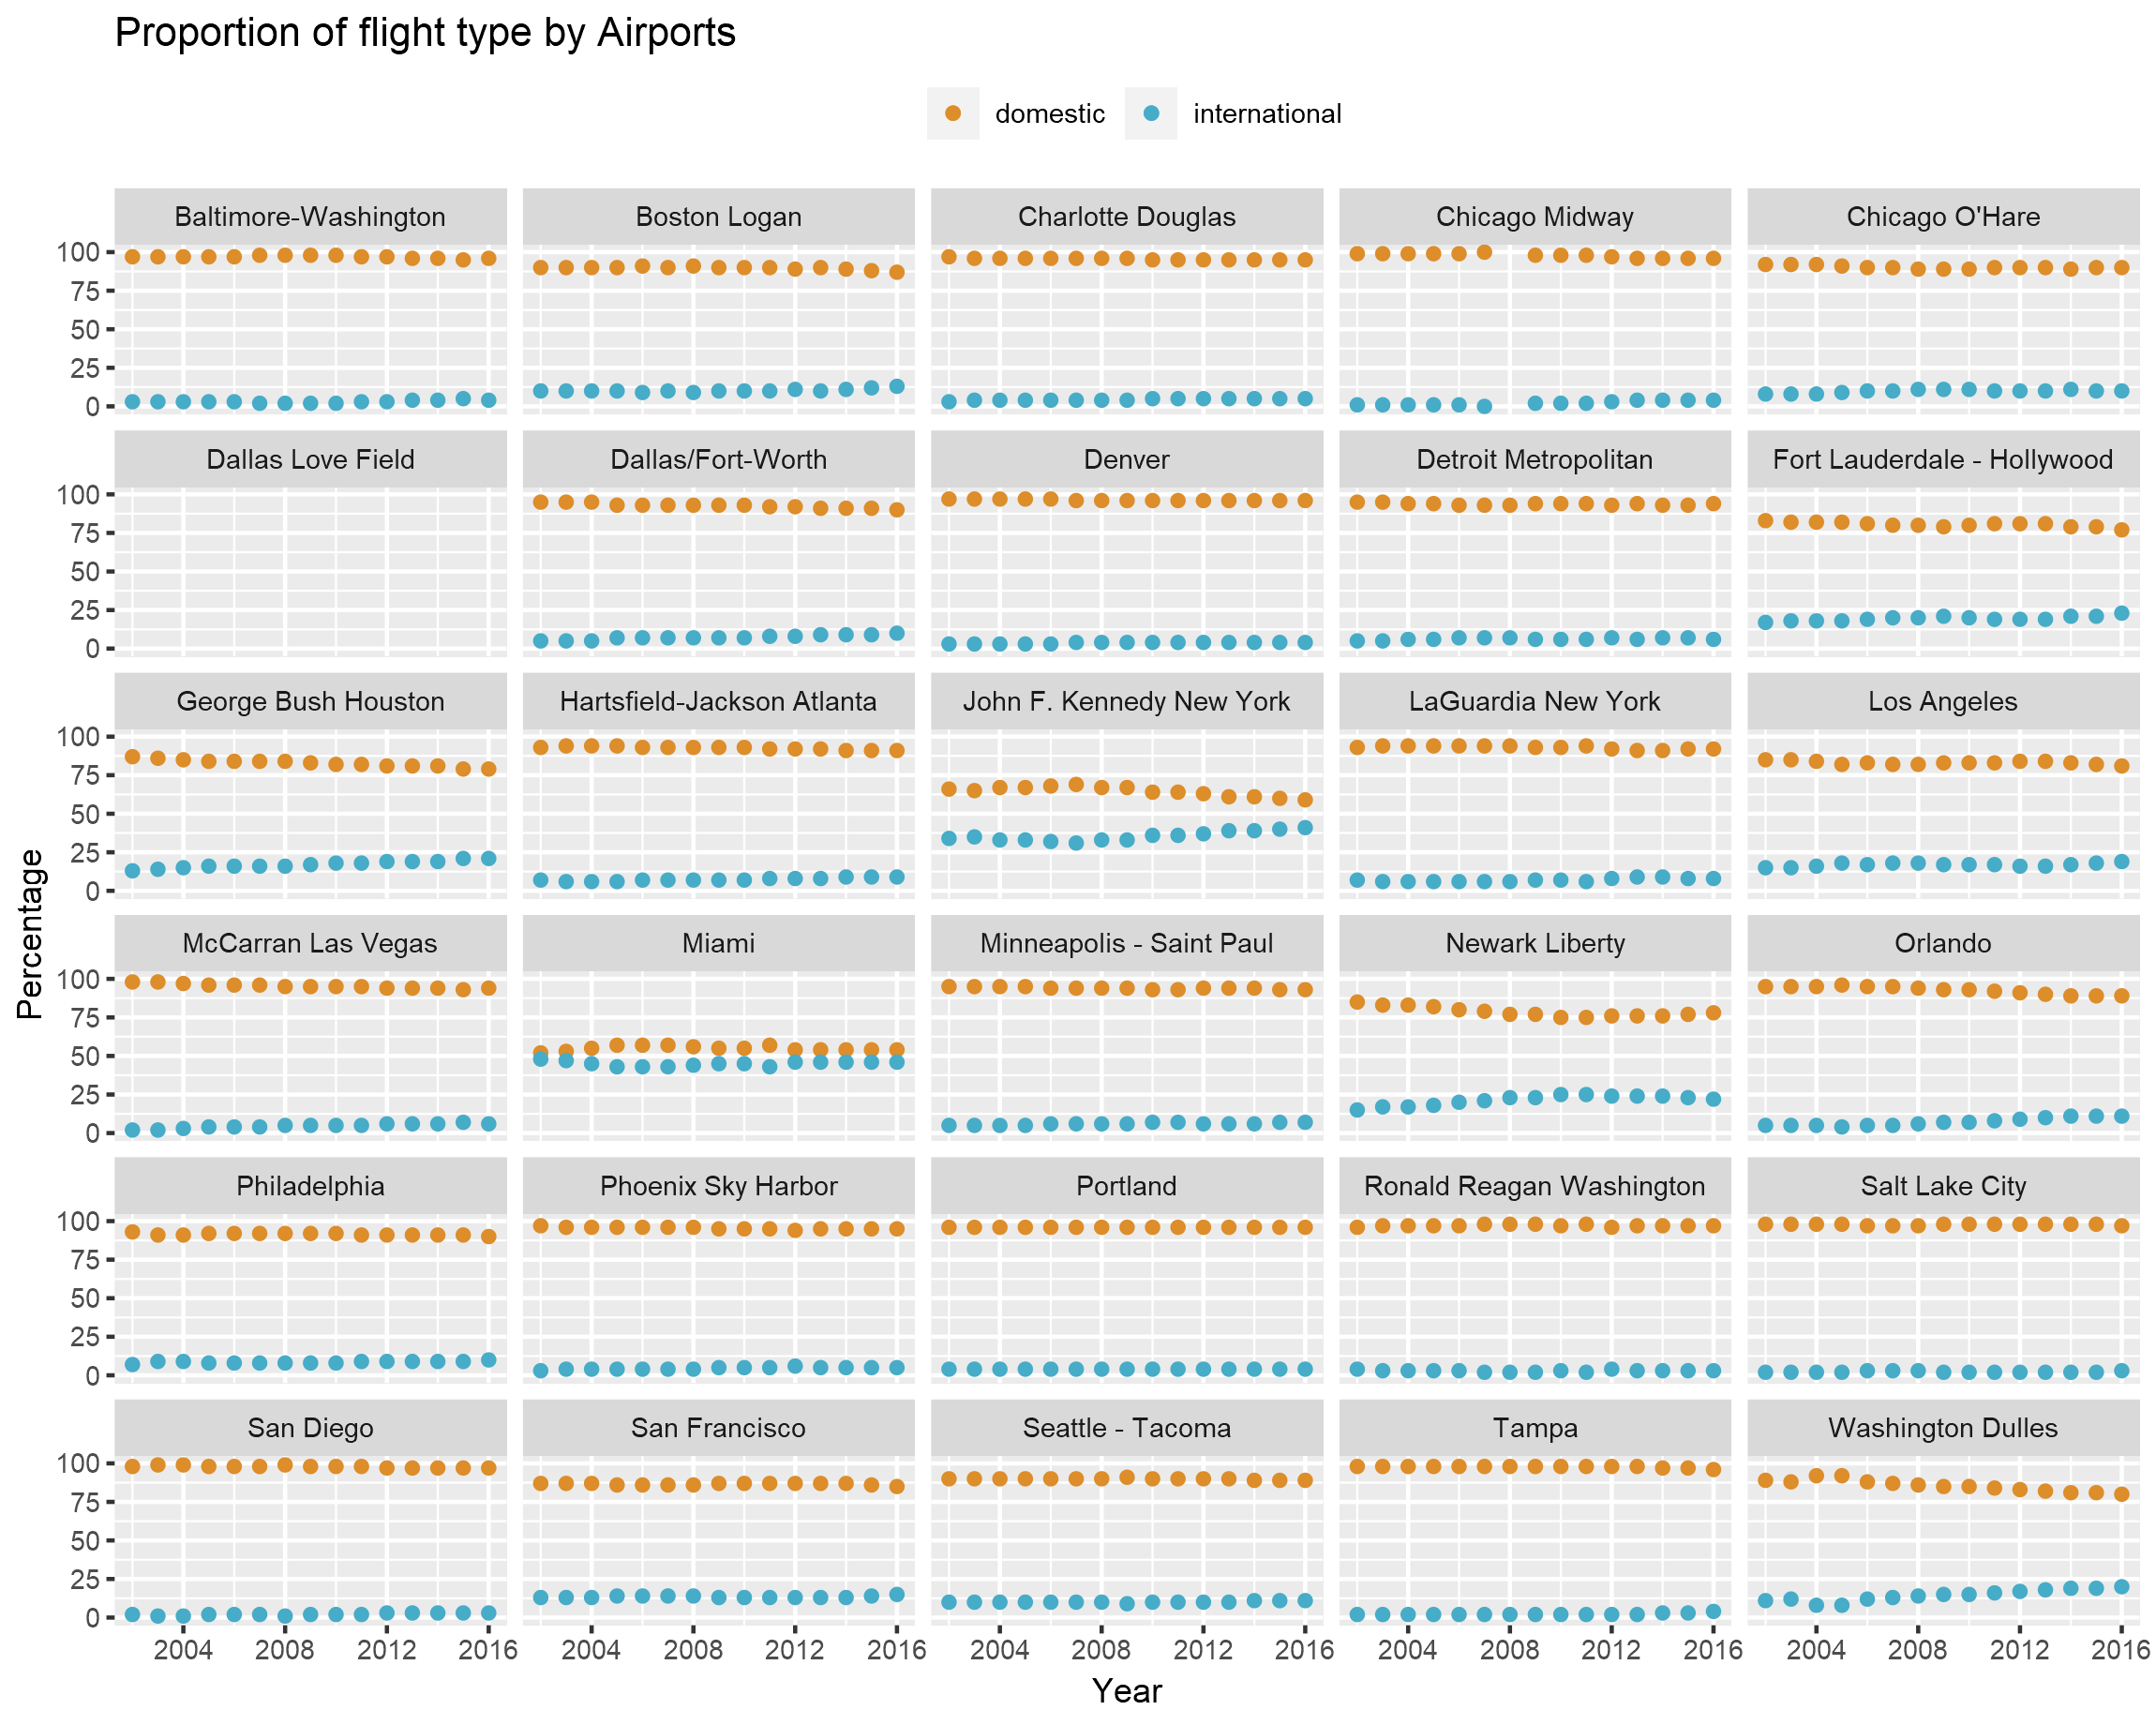

In [13]:
options(repr.plot.width=10, repr.plot.height=8,repr.plot.res = 230) #Defining the picture size and resolution
ggplot(data=SummaryPercent, aes(x=Year))+
geom_point(aes(y=DomesticFlightsPerc,color="domestic")) + 
geom_point(aes(y=InternationalFlightsPerc,color="international")) +
  scale_colour_manual(name="",values=c(domestic="#DD8D29",international="#46ACC8")) +
  facet_wrap(~Airport.Name,ncol=5) + 
  ggtitle('Proportion of flight type by Airports')+
  theme(legend.position='top') +
  ylab("Percentage")

Some airports like Seattle-Tacoma, Baltimore, San Francisco show a consistent pattern. No significant increase or decrease in the domestic and international flights is observed. In Miami, we see that about 50% flights are domestic and remaining 50% are international flights. It appears that the percentage of international flights landing and departing from Washington airport has increased over the years. 

### Heatmap - Domestic Flights

Imputing the NA values as 0

In [28]:
Airlines_dff$Flights_International[is.na(Airlines_dff$Flights_International)] = 0
Airlines_dff$Flights_Domestic[is.na(Airlines_dff$Flights_Domestic)] = 0

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



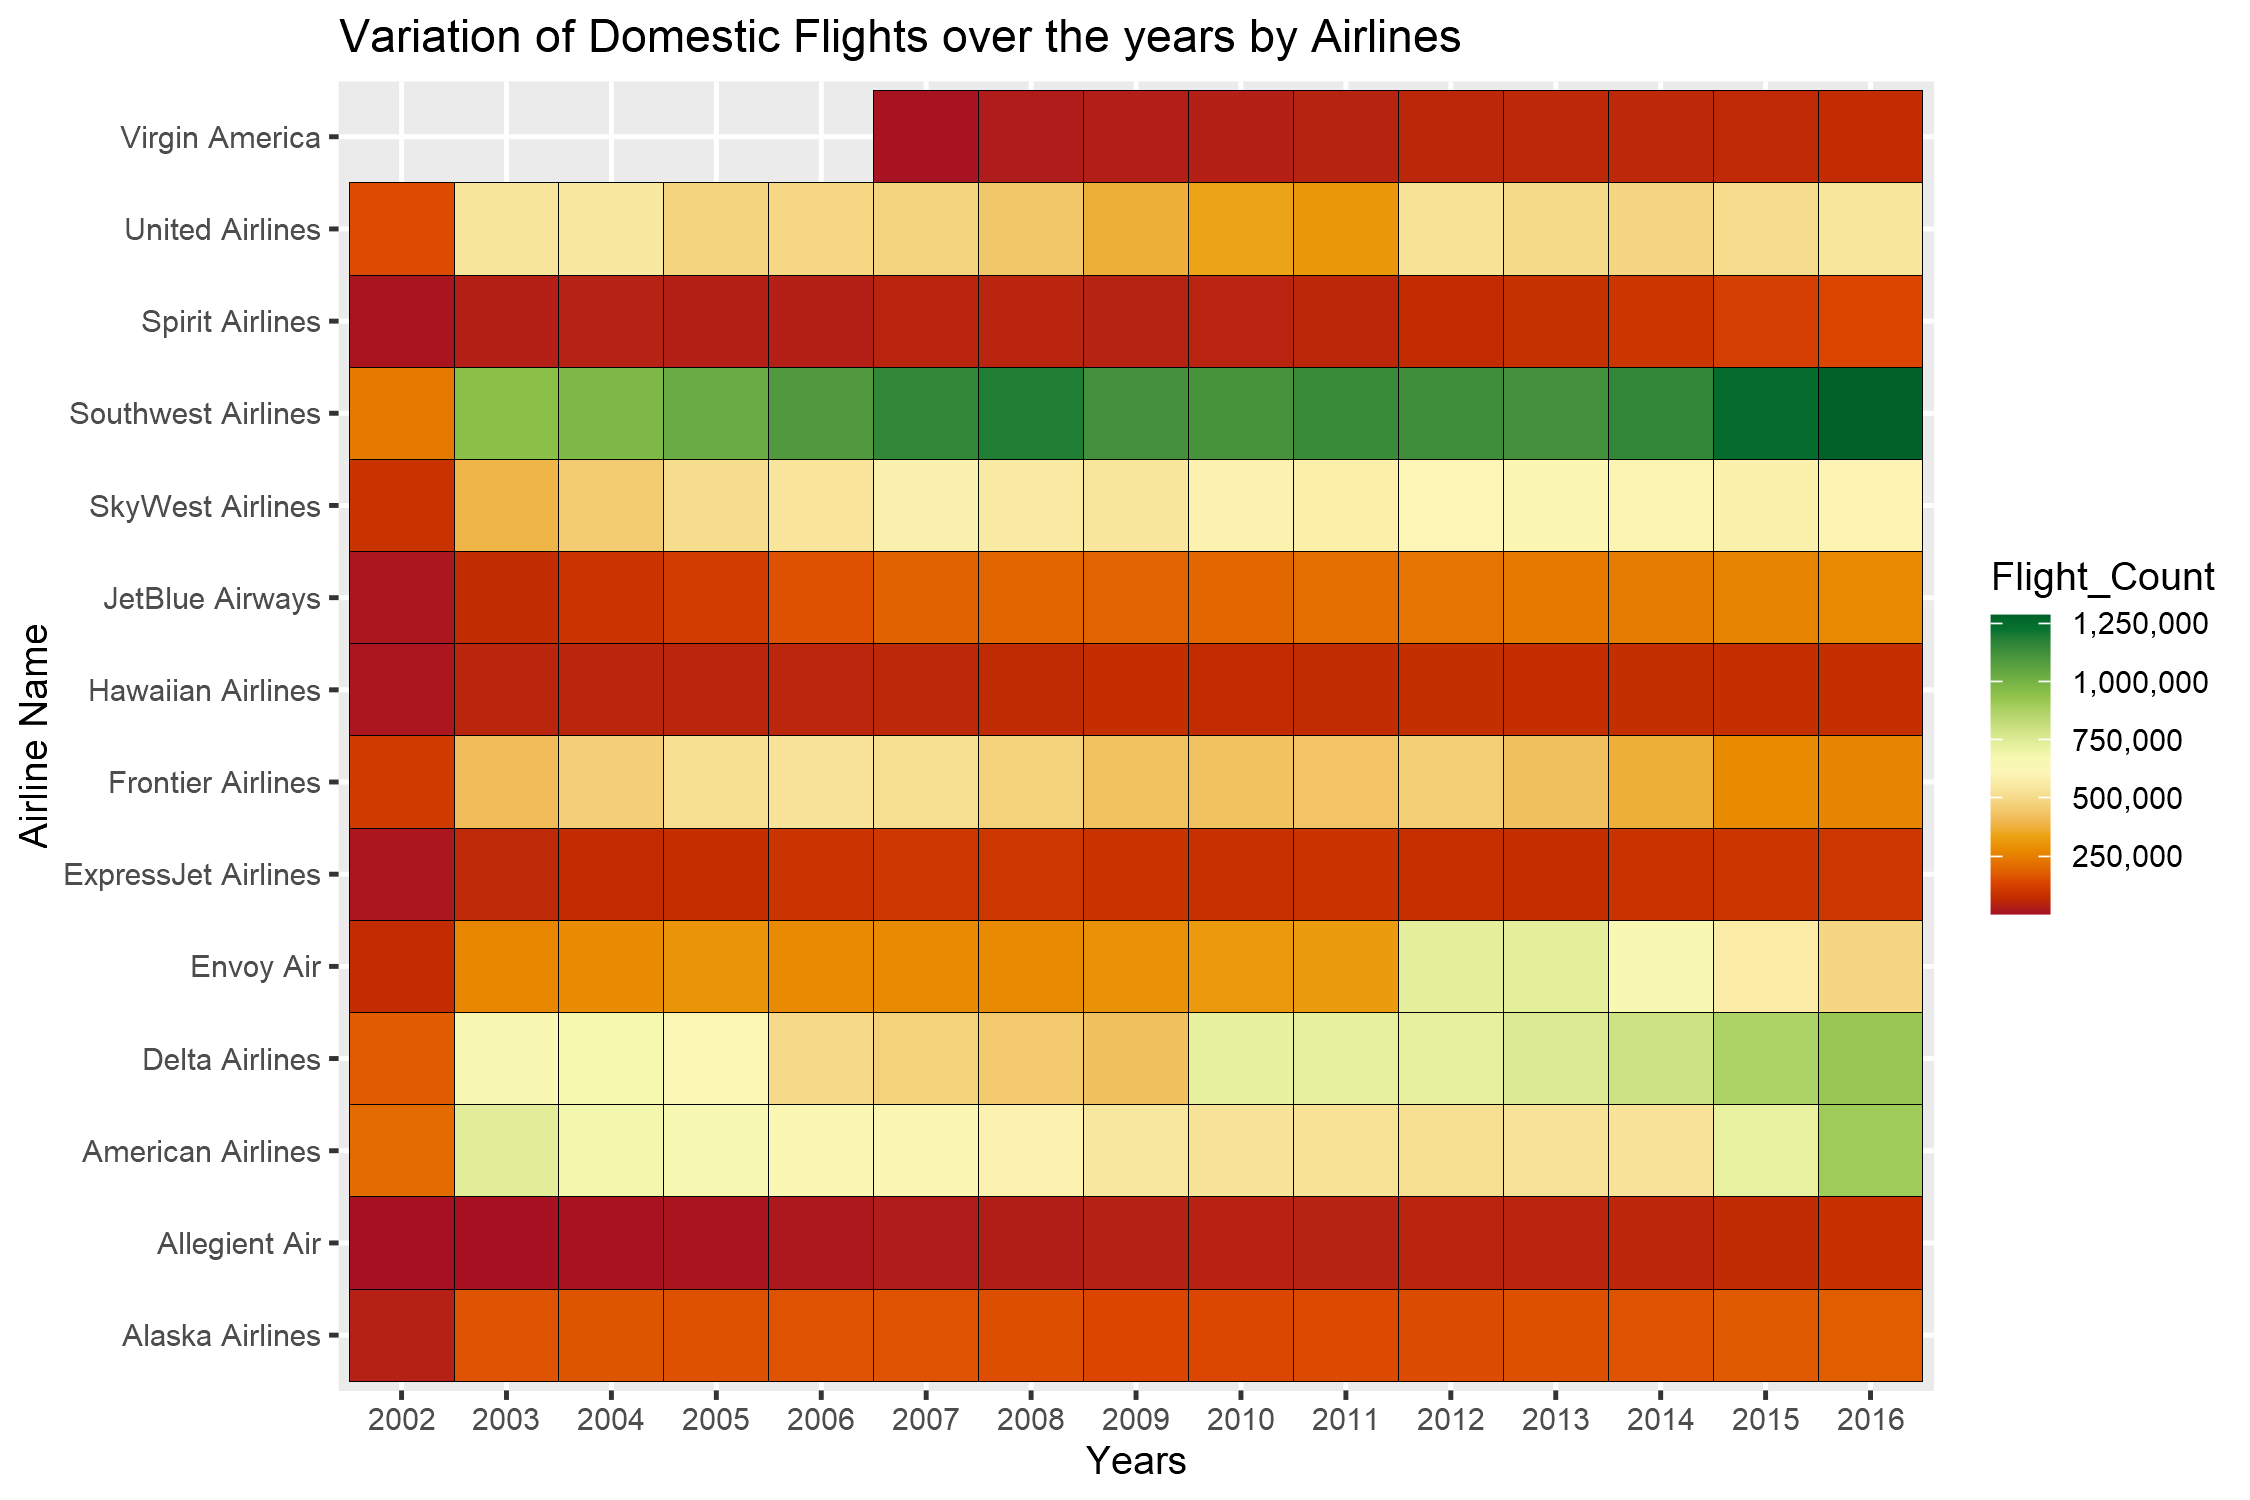

In [36]:
Airlines_dff %>%
group_by(Year, Airline.Name) %>%
filter(Year<2017) %>%
summarise(Flight_Count = sum(Flights_Domestic)) %>%
ggplot(aes(x=as.factor(Year), y=Airline.Name, fill = Flight_Count))+geom_tile()+  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), label = comma) +
ggtitle('Variation of Domestic Flights over the years by Airlines')+
ylab("Airline Name")+
xlab("Years")

### Heatmap - International Flights

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



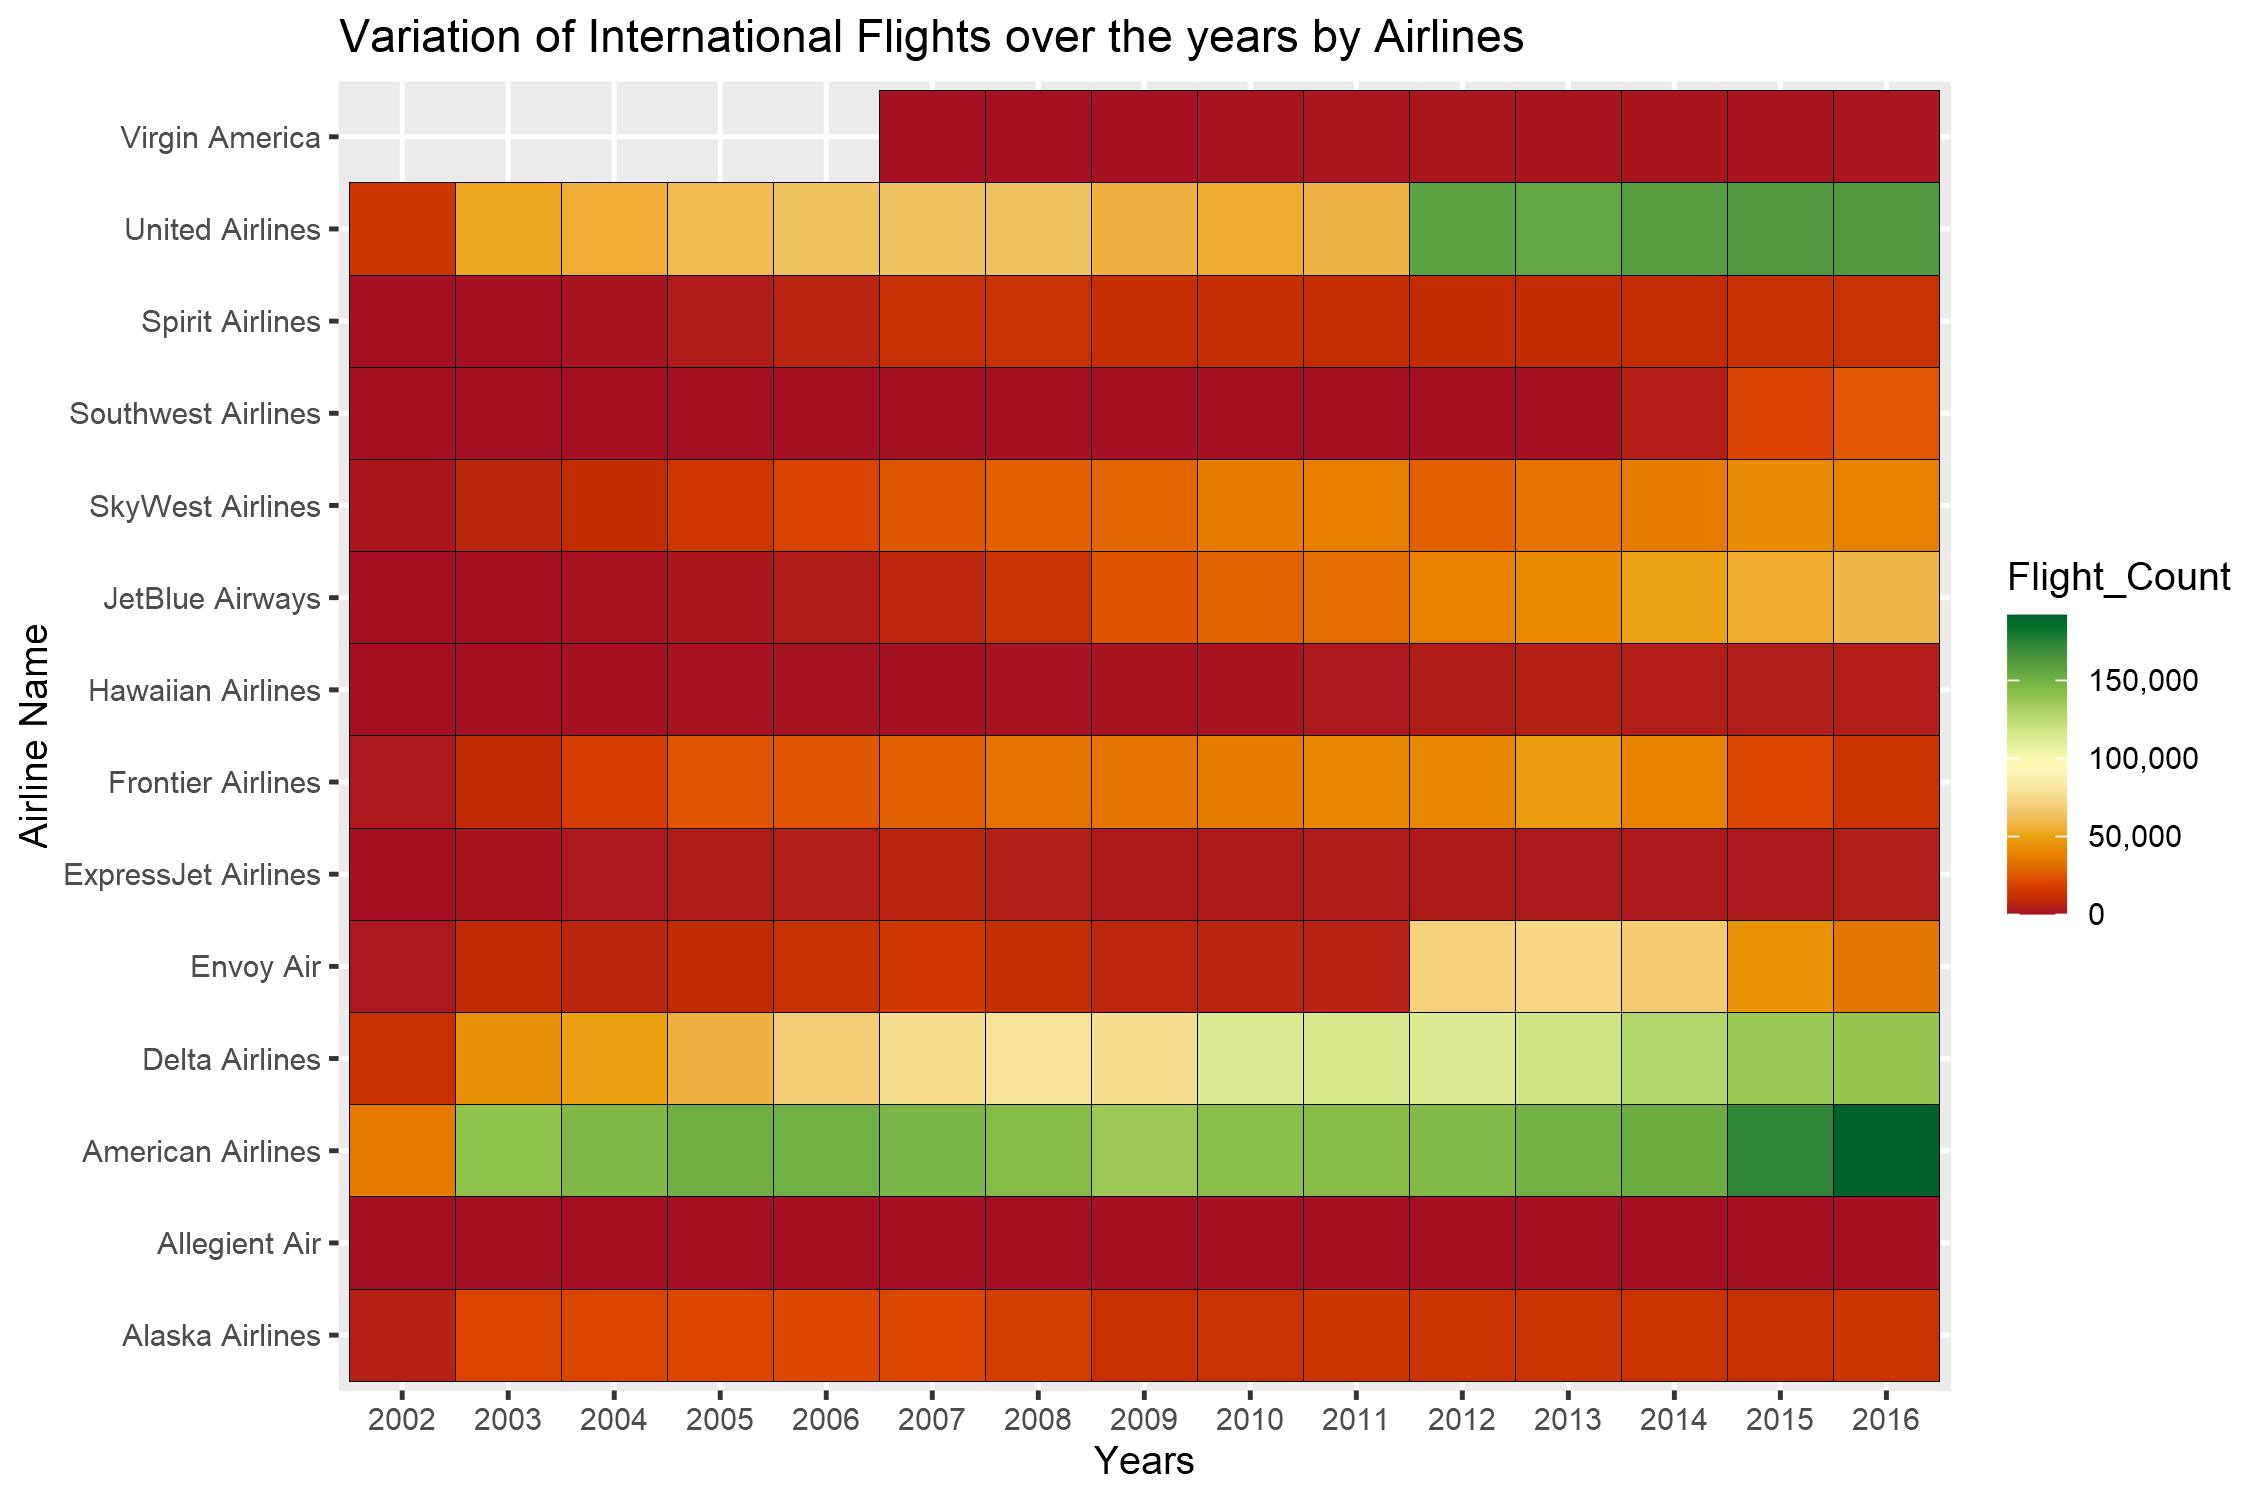

In [37]:
Airlines_dff %>%
group_by(Year, Airline.Name) %>%
filter(Year<2017) %>%
summarise(Flight_Count = sum(Flights_International)) %>%
ggplot(aes(x=as.factor(Year), y=Airline.Name, fill = Flight_Count))+geom_tile()+  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), label = comma) +
ggtitle('Variation of International Flights over the years by Airlines')+ylab("Airline Name")+
xlab("Years")

## Exploring Year 2014

In [14]:
head(df)

Airport.Code,Airport.Name,long,lat
ATL,Hartsfield-Jackson Atlanta,-84.42770,33.64073
BWI,Baltimore-Washington,-76.66839,39.17740
BOS,Boston Logan,-71.00956,42.36561
CLT,Charlotte Douglas,-80.94731,35.21440
MDW,Chicago Midway,-87.75219,41.78678
ORD,Chicago O'Hare,-87.90732,41.97416


In [15]:
head(SummaryPercent)

Year,Airport.Name,DomesticFlights,InternationalFlights,FlightSum,InternationalFlightsPerc,DomesticFlightsPerc
2002,Baltimore-Washington,27212,792,28004,3,97
2002,Boston Logan,37913,4353,42266,10,90
2002,Charlotte Douglas,44126,1449,45575,3,97
2002,Chicago Midway,27953,215,28168,1,99
2002,Chicago O'Hare,101585,8688,110273,8,92
2002,Dallas Love Field,11242,NA,NA,NA,NA


### Merging the above two dataframes by Airport.Name

In [16]:
Yr2012 = na.omit(merge(df,SummaryPercent %>% filter(Year==2014),by='Airport.Name'))

### Barchart showing the top 7 busiest Airports

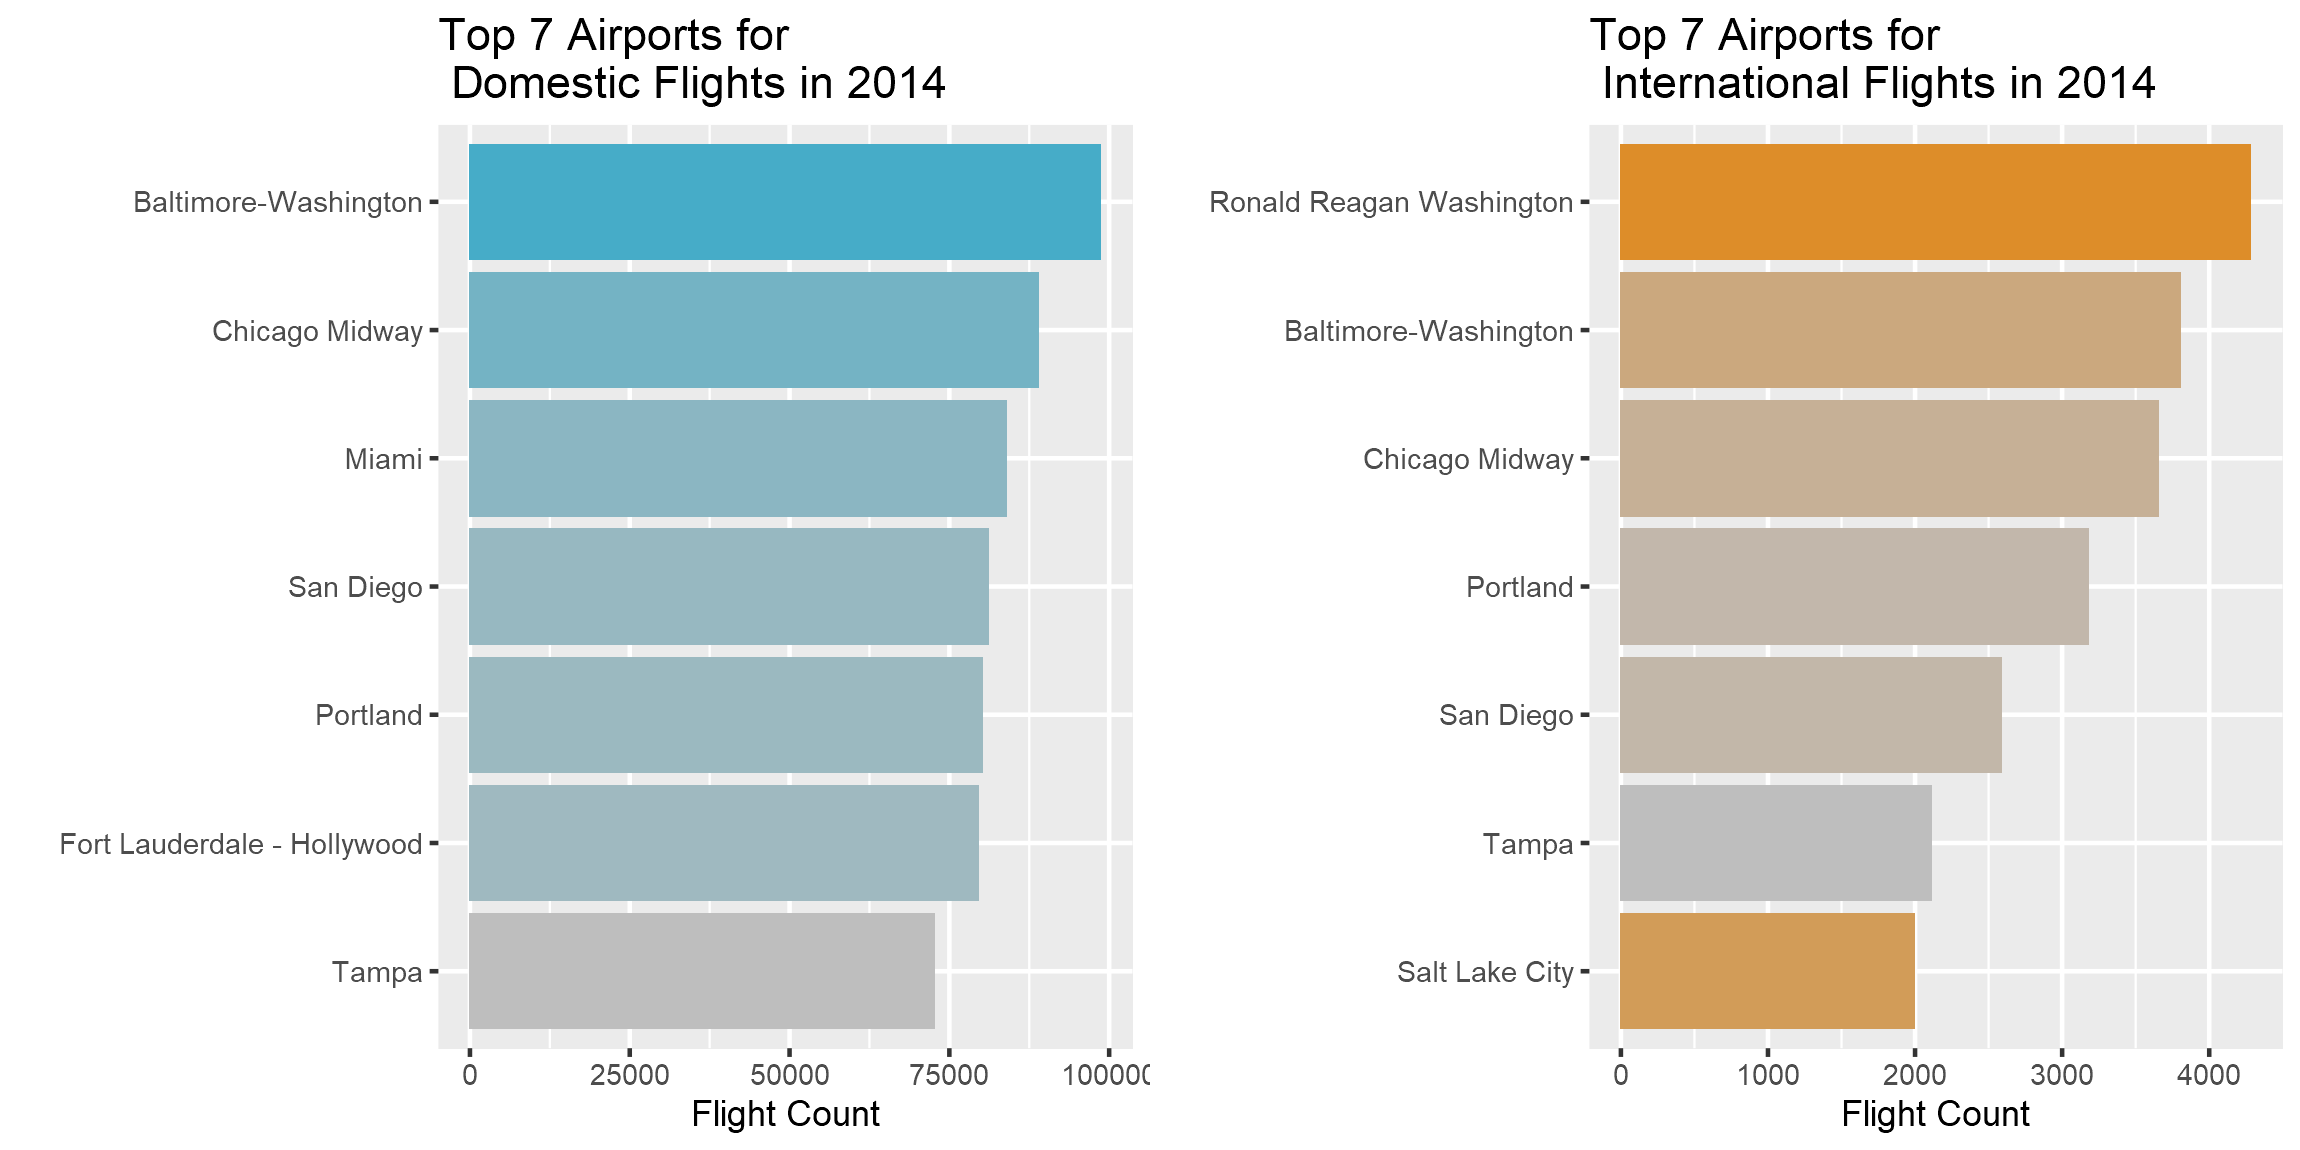

In [39]:
options(repr.plot.width=10, repr.plot.height=5,repr.plot.res = 230) #Defining the picture size and resolution
yr2k12Plot_domestic = Yr2012 %>% arrange(DomesticFlights) %>% head(7) %>% ggplot(aes(x=reorder(Airport.Name,DomesticFlights),y=DomesticFlights)) + 
  geom_bar(aes(fill=DomesticFlights),stat='identity')+ 
coord_flip()+scale_fill_gradientn(name='',colors=colorRampPalette(c("gray","#46ACC8"))(7)) + 
  theme(legend.position='none',plot.title = element_text(size =14)) +
  ggtitle('Top 7 Airports for\n Domestic Flights in 2014')+ylab("Flight Count")+xlab("")

yr2k12Plot_int = Yr2012 %>% arrange(InternationalFlights) %>% head(7) %>% 
ggplot(aes(x=reorder(Airport.Name,InternationalFlights),y=InternationalFlights))+ylab("Flight Count")+
  geom_bar(aes(fill=DomesticFlights),stat='identity')+
coord_flip()+scale_fill_gradientn(name='',colors=colorRampPalette(c("gray","#DD8D29"))(7)) + xlab("") +
  theme(legend.position='none',plot.title = element_text(size =14)) +
  ggtitle('Top 7 Airports for\n International Flights in 2014')

grid.arrange(yr2k12Plot_domestic,yr2k12Plot_int,nrow=1)

Warning message:
"Use of `df$Airport.Name` is discouraged. Use `Airport.Name` instead."
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


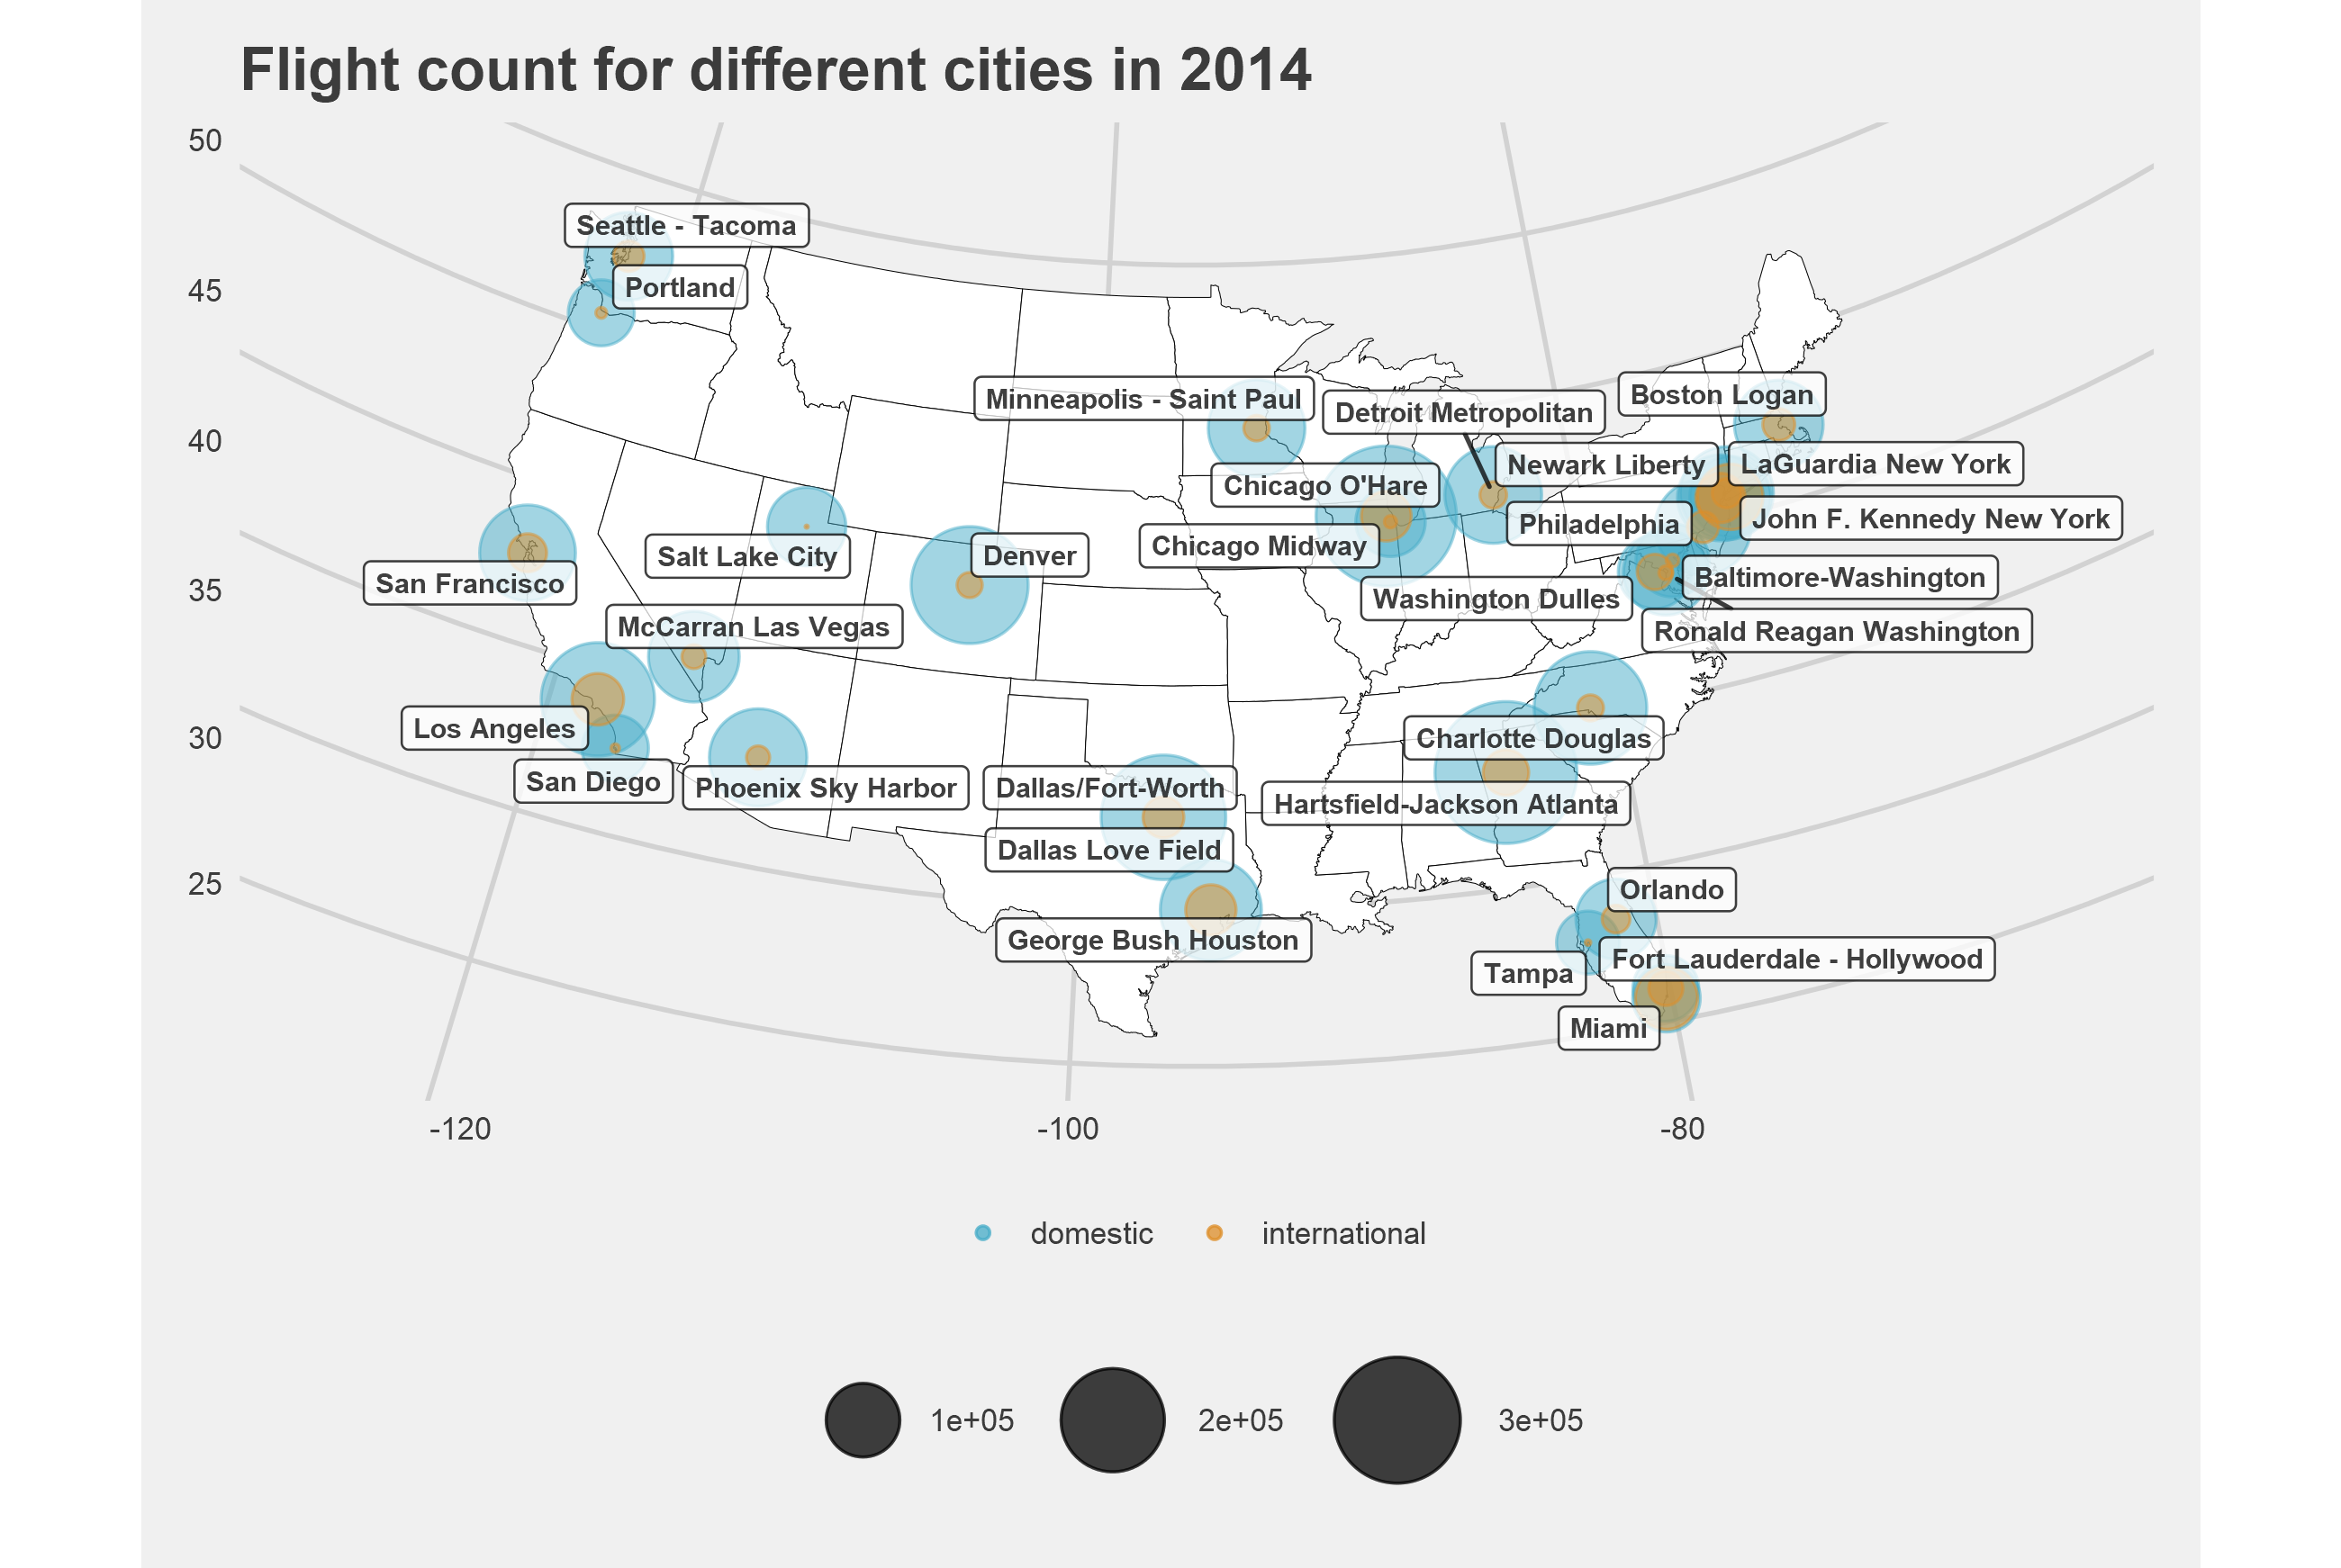

In [18]:
options(repr.plot.height=6.7,repr.plot.res = 260) #Defining the picture size and resolution
USMAP+
geom_point(data=Yr2012,aes(x=long,y=lat,size=DomesticFlights,color="domestic"),alpha=.5) + 
  geom_point(data=Yr2012,aes(x=long,y=lat,size=InternationalFlights,color="international"),alpha=.5) + 
  geom_label_repel(data=df,aes(x=long,y=lat,label=df$Airport.Name),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.1, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=.75,force=10) + 
  scale_colour_manual(name="",values=c(domestic="#46ACC8",international="#DD8D29")) + 
  theme_fivethirtyeight() + 
  scale_size(range = c(0, 20)) + 
  theme(legend.title=element_blank()) + 
  coord_map("albers", lat0=39, lat1=49) + 
  ggtitle('Flight count for different cities in 2014')

In [50]:
AllAirlines<-read.csv('airline_codes.csv')

# Creating a list which will contain the Airline Code, Airline Name and other important stats
allAirlines<-list()
cnt<-1
for(i in 1:length(AllAirlines$Airline.Code)){
    if(AllAirlines$Airline.Code[i]!='5Y'){
        allAirlines[[cnt]]<-read.csv(paste0('data/',AllAirlines$Airline.Code[i],'-all_airports.csv'))
        allAirlines[[cnt]]$Airline.Code<-rep(AllAirlines$Airline.Code[i],nrow(allAirlines[[cnt]]))
        allAirlines[[cnt]]$Airline.Name<-rep(AllAirlines$Airline.Name[i],nrow(allAirlines[[cnt]]))
        cnt=cnt+1
        }
}

Airlines_dff <- do.call("rbind", allAirlines)

Airlines_dff$Date = as.Date(Airlines_dff$Date, format = "%Y-%m-%d")
Airlines_dff$Month = months(as.Date(Airlines_dff$Date, format = "%Y-%m-%d"))
Airlines_dff$Year =as.numeric(format(Airlines_dff$Date, "%Y"))

In [41]:
t = Airlines_dff %>% 
  group_by(Year, Airline.Name) %>% 
  select(-Date,-Airline.Code,-Airline.Name,-Year,-Month) %>% 
  summarise_all(funs(sum))

dd = data.frame(t %>% group_by(Year, Airline.Name) %>% summarise_all(funs(sum)))

Adding missing grouping variables: `Year`, `Airline.Name`



In [51]:
head(dd)

Year,Airline.Name,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
2002,Alaska Airlines,3934978,823959,37562,5142,2913737,452560,2636424,527682
2002,Allegient Air,27550,NA,467,0,30606,NA,13170,NA
2002,American Airlines,29754707,12395613,205047,35962,18793013,3945328,20694131,8741193
2002,Delta Airlines,24378688,7677904,176241,11770,20913039,1604401,17542384,5386352
2002,Envoy Air,1237951,102928,69240,2556,2239492,74026,855985,63105
2002,ExpressJet Airlines,1526776,NA,13511,27,994023,NA,889572,NA


### Radarchart showing Airline Performance in 2014

In [42]:
#define the max values for each (year,features) among all Airlines
maxVal<-data.frame(dd %>% select(-Airline.Name) %>% group_by(Year) %>% na.omit() %>% summarise_all(funs(max)))
#define color palette for different Airlines
col_airlines<-colorRampPalette(mycols)(length(unique(Airlines_dff$Airline.Name)))

data2014 =  as.data.frame(t %>% filter(Year==2014))
min=rep.int(0,8)
max_2014 = 1.01*(maxVal[15,2:9] %>% sapply(as.integer) %>% as.vector)

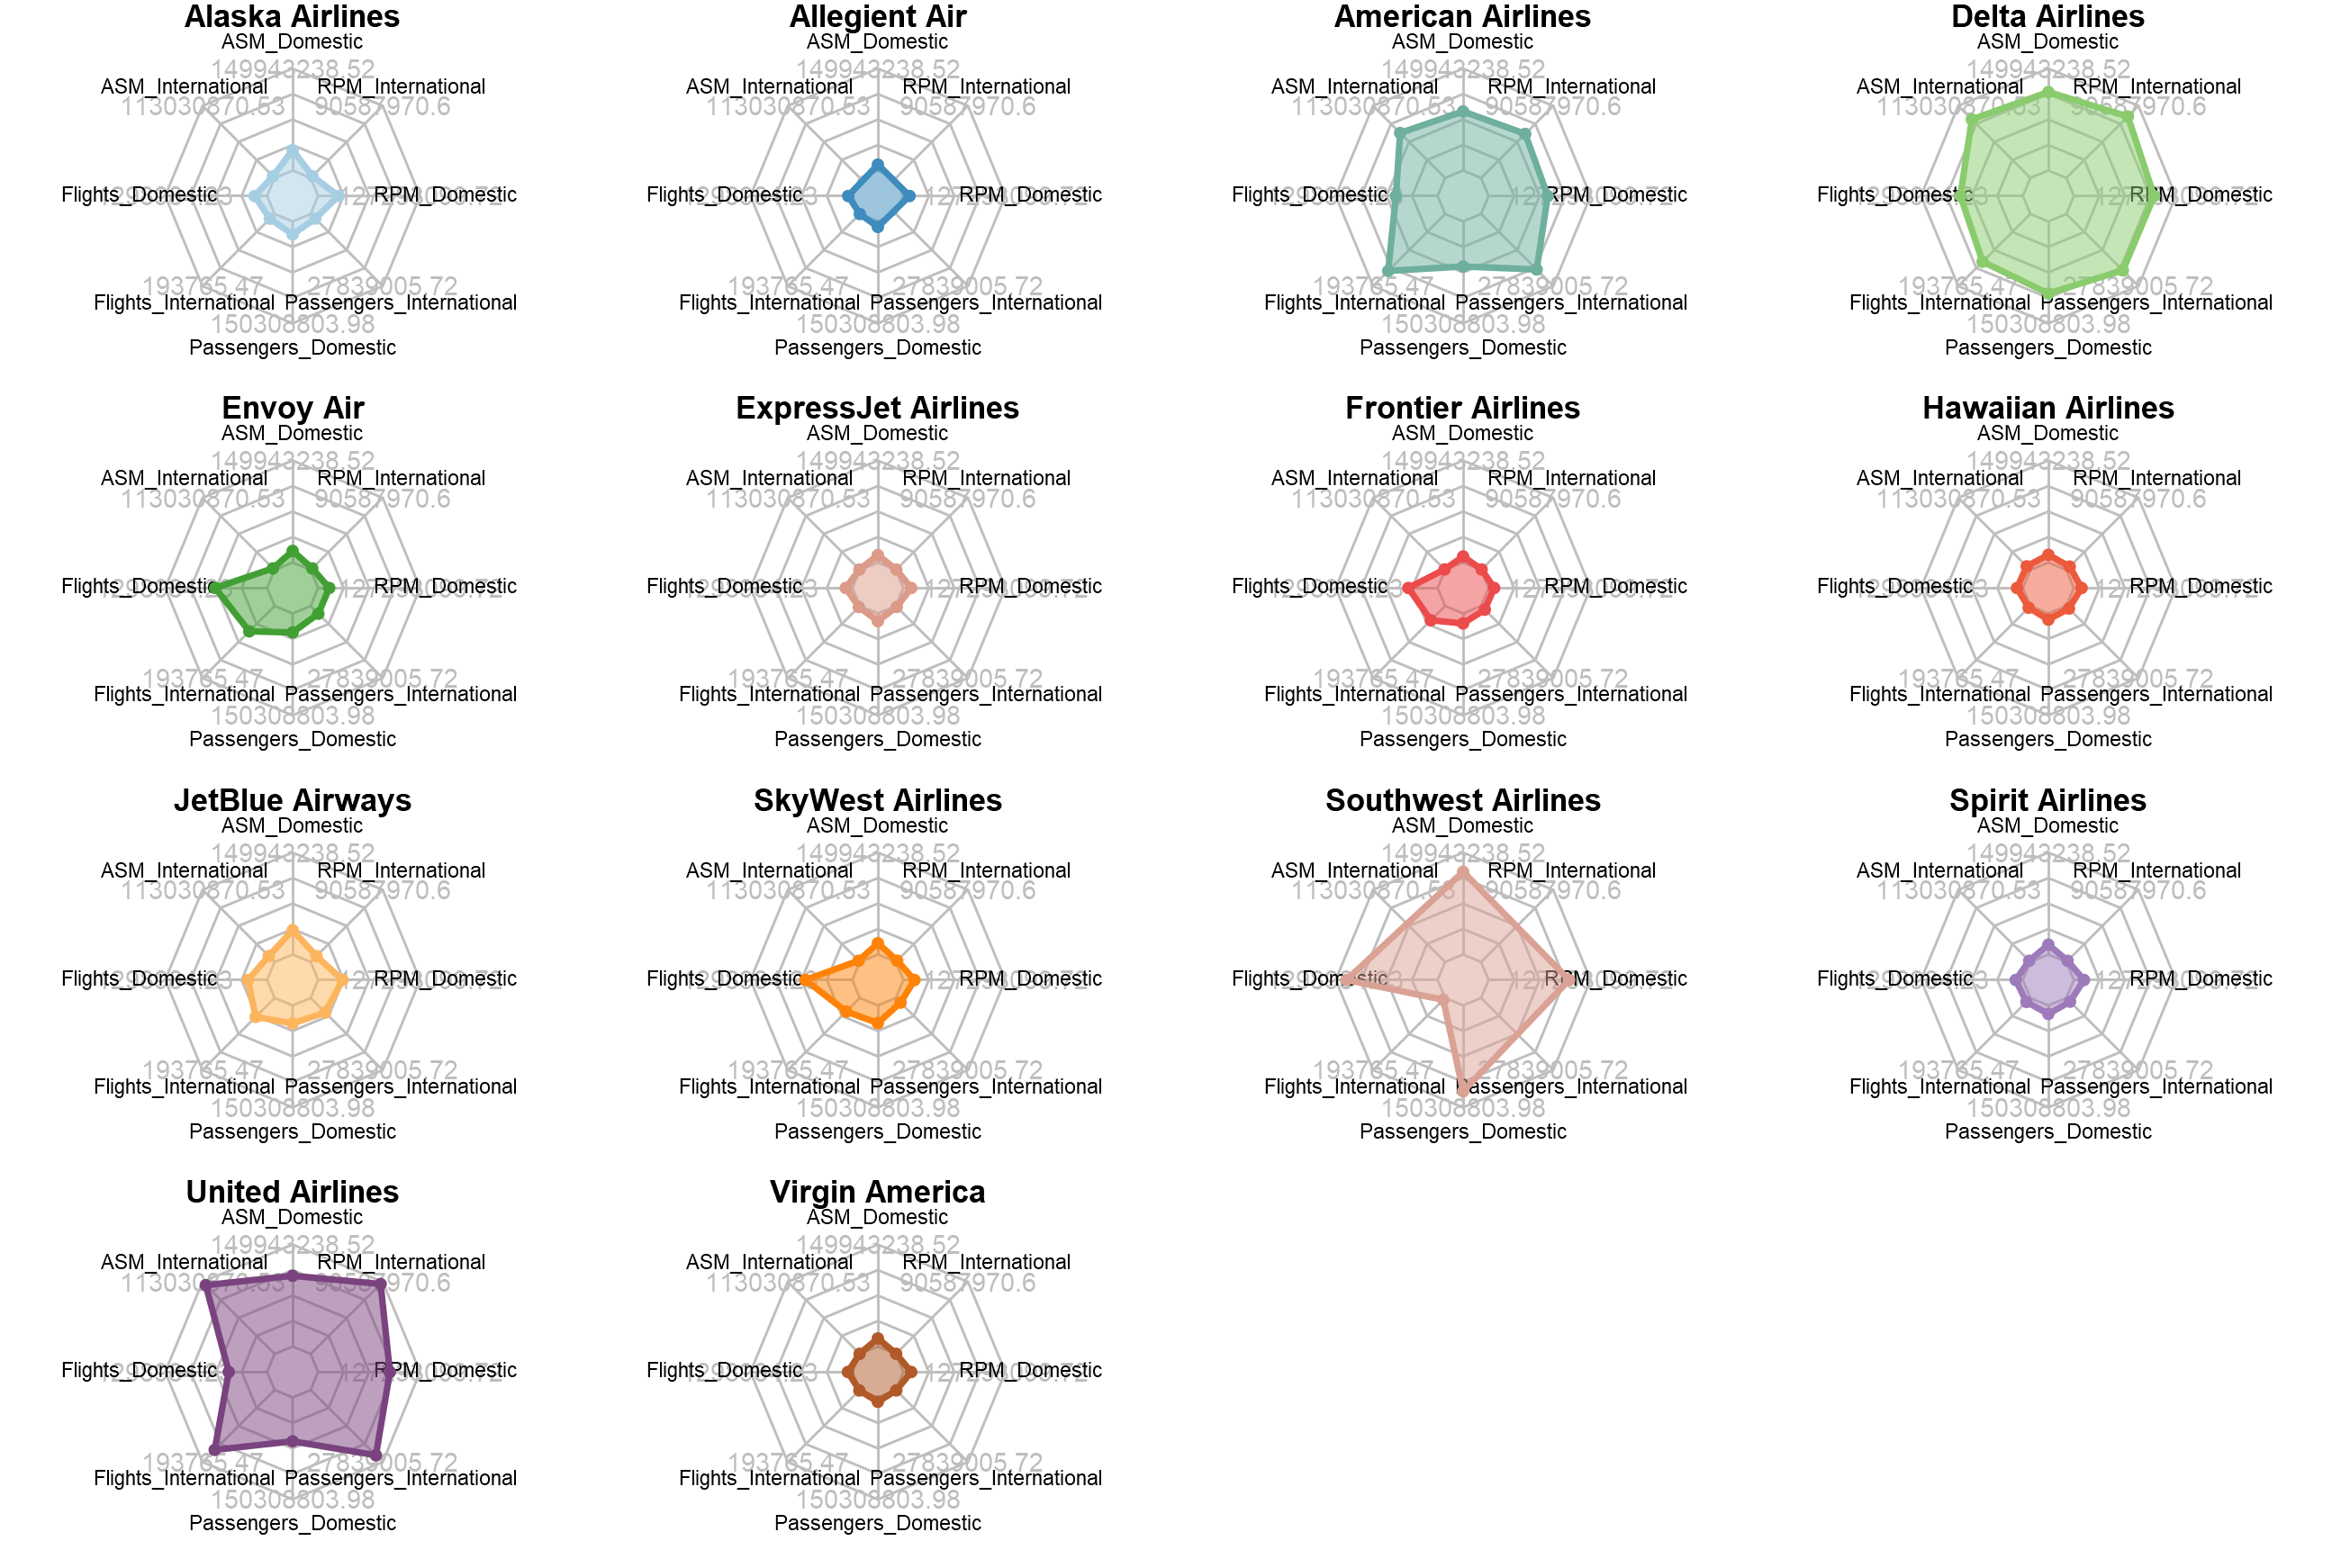

In [78]:
options(repr.plot.height=6.7,repr.plot.res = 260) #Defining the picture size and resolution
par(mfrow=c(4,4))
par(mar=c(1,1,1,1))
for(i in 1:nrow(data2014)){
    curCol<-(col2rgb(col_airlines[i])%>% as.integer())/255
    radarchart(rbind(max_2014,min,data2014[i,3:10]),
               axistype=2 , 
               pcol=rgb(curCol[1],curCol[2],curCol[3], alpha = 1) ,
               pfcol=rgb(curCol[1],curCol[2],curCol[3],.5) ,
               plwd=2 , cglcol="grey", cglty=1, 
               axislabcol="grey", caxislabels=seq(0,2000,5), cglwd=0.8, vlcex=0.8
               ,title=as.character(data2014$Airline.Name[i]))
}

## Conclusion

In this notebook we analyzed the US Commercial Aviation Dataset. Over the years number of domestic flights and international flights have increased over the years. While **Hartsfield-Jackson Atlanta International Airport, Chicago O'hare International Airport, Dallas Fort Worth** appears to be the biggest hubs for domestic flights. Whereas **John F. Kennedy International Airport, Miami International Airport, and Los Angeles International Airport** appear to be the biggest hubs for international flights. 

**Southwest Airlines** operates more domestic flights in the 30 major hubs mentioned in the dataset than any other US Airlines. Wheres **United, American, and Delta** operate more international flights as compared to any other US carrier. 

Airports like **John F. Kennedy International Airport, Washington-Dulles International Airport, and George Bush Intercontinental Airport** we have seen a steady increase in the percentage of International flights from these airports each year.  

In the year 2014, **Baltimore/Washington International Thurgood Marshall Airport** was the busiest airport for domestic flights and **Ronald Reagan Washington National Airport** was the busies airport for International flights.

**- Deepansh Arora**